<h1 align="center",style="color:Green">Telecom Churn Case Study</h1>

<h2>Business problem overview</h2>

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.


To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

<h2>High-value churn</h2>

In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.


In this project, we  will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

# 1. Reading the data

- Importing the essential libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, metrics


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

- Importing the dataset.

In [2]:
df=pd.read_csv("telecom_churn_data.csv")

- Reading the initial rows.

In [3]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
# looking at shape of dataframe df
df.shape

(99999, 226)

In [6]:
# looking at all numerical  variables analysis
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
# calculating null percentage column wise and arranging them in descending order
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
total_rech_data_6           74.846748
arpu_3g_6                   74.846748
arpu_2g_6                   74.846748
night_pck_user_6            74.846748
fb_user_6                   74.846748
arpu_3g_7                   74.428744
count_rech_2g_7             74.428744
fb_user_7                   74.428744
count_rech_3g_7             74.428744
arpu_2g_7                   74.428744
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_7    74.428744
night_pck_user_9            74.077741
date_of_last_rech_data_9    74.077741
fb_user_9                   74.077741
arpu_2g_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
total_rech_d

Imputing null values with 0 in case where we have conditions full filled.

In [8]:
# since date_of_last_rech_data_6 is null and max_rech_data_6, total_rech_data_6  is also null we can impute 0 for max_rech_data_6 and total_rech_data_6 as no recharge was done..
for i in range(len(df)):
    if pd.isnull(df['date_of_last_rech_data_6'][i]):
        if pd.isnull((df['total_rech_data_6'][i]) and (df['max_rech_data_6'][i])):
            df['total_rech_data_6'][i]=0
            df['max_rech_data_6'][i]=0

In [9]:
# since date_of_last_rech_data_7 is null and max_rech_data_7, total_rech_data_7  is also null we can impute 0 for max_rech_data_7 and total_rech_data_7 as no recharge was done..
for i in range(len(df)):
    if pd.isnull(df['date_of_last_rech_data_7'][i]):
        if pd.isnull((df['total_rech_data_7'][i]) and (df['max_rech_data_7'][i])):
            df['total_rech_data_7'][i]=0
            df['max_rech_data_7'][i]=0

In [10]:
# since date_of_last_rech_data_8 is null and max_rech_data_8, total_rech_data_8  is also null we can impute 0 for max_rech_data_8 and total_rech_data_8 as no recharge was done..
for i in range(len(df)):
    if pd.isnull(df['date_of_last_rech_data_8'][i]):
        if pd.isnull((df['total_rech_data_8'][i]) and (df['max_rech_data_8'][i])):
            df['total_rech_data_8'][i]=0
            df['max_rech_data_8'][i]=0

In [11]:
# since date_of_last_rech_data_9 is null and max_rech_data_9, total_rech_data_9  is also null we can impute 0 for max_rech_data_9 and total_rech_data_9 as no recharge was done..
for i in range(len(df)):
    if pd.isnull(df['date_of_last_rech_data_9'][i]):
        if pd.isnull((df['total_rech_data_9'][i]) and (df['max_rech_data_9'][i])):
            df['total_rech_data_9'][i]=0
            df['max_rech_data_9'][i]=0

In [12]:
# since total_rech_data_6 is 0 and count_rech_2g_6, count_rech_3g_6  is null we can impute 0 for count_rech_2g_6 and count_rech_3g_6 as total was 0, no recharge was done..
for i in range(len(df)):
    if (df['total_rech_data_6'][i]==0):
        if pd.isnull((df['count_rech_2g_6'][i]) and (df['count_rech_3g_6'][i])):
            df['count_rech_2g_6'][i]=0
            df['count_rech_3g_6'][i]=0

In [13]:
# since total_rech_data_7 is 0 and count_rech_2g_7, count_rech_3g_7  is null we can impute 0 for count_rech_2g_7 and count_rech_3g_7 as total was 0, no recharge was done..
for i in range(len(df)):
    if (df['total_rech_data_7'][i]==0):
        if pd.isnull((df['count_rech_2g_7'][i]) and (df['count_rech_3g_7'][i])):
            df['count_rech_2g_7'][i]=0
            df['count_rech_3g_7'][i]=0

In [14]:
# since total_rech_data_8 is 0 and count_rech_2g_8, count_rech_3g_8  is null we can impute 0 for count_rech_2g_8 and count_rech_3g_8 as total was 0, no recharge was done..
for i in range(len(df)):
    if (df['total_rech_data_8'][i]==0):
        if pd.isnull((df['count_rech_2g_8'][i]) and (df['count_rech_3g_8'][i])):
            df['count_rech_2g_8'][i]=0
            df['count_rech_3g_8'][i]=0

In [15]:
# since total_rech_data_9 is 0 and count_rech_2g_9, count_rech_3g_9  is null we can impute 0 for count_rech_2g_9 and count_rech_3g_9 as total was 0, no recharge was done..
for i in range(len(df)):
    if (df['total_rech_data_9'][i]==0):
        if pd.isnull((df['count_rech_2g_9'][i]) and (df['count_rech_3g_9'][i])):
            df['count_rech_2g_9'][i]=0
            df['count_rech_3g_9'][i]=0

In [16]:
# since total_rech_data_6 is equal to 0 we can say that av_rech_amt_data_6 will also be 0 in place of null.
for i in range(len(df)):  
    if (pd.isnull(df['av_rech_amt_data_6'][i]) and (df['total_rech_data_6'][i]==0)):
        df['av_rech_amt_data_6'][i] = 0

In [17]:
# since total_rech_data_7 is equal to 0 we can say that av_rech_amt_data_7 will also be 0 in place of null.
for i in range(len(df)):  
    if (pd.isnull(df['av_rech_amt_data_7'][i]) and (df['total_rech_data_7'][i]==0)):
        df['av_rech_amt_data_7'][i] = 0

In [18]:
# since total_rech_data_8 is equal to 0 we can say that av_rech_amt_data_8 will also be 0 in place of null.
for i in range(len(df)):  
    if (pd.isnull(df['av_rech_amt_data_8'][i]) and (df['total_rech_data_8'][i]==0)):
        df['av_rech_amt_data_8'][i] = 0

In [19]:
# since total_rech_data_9 is equal to 0 we can say that av_rech_amt_data_9 will also be 0 in place of null.
for i in range(len(df)):  
    if (pd.isnull(df['av_rech_amt_data_9'][i]) and (df['total_rech_data_9'][i]==0)):
        df['av_rech_amt_data_9'][i] = 0

#  Cleaning and visualizing the data

- Finding out the null value percentage of all the columns.

In [20]:
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

date_of_last_rech_data_6    74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_6                   74.85
date_of_last_rech_data_7    74.43
night_pck_user_7            74.43
fb_user_7                   74.43
arpu_3g_7                   74.43
arpu_2g_7                   74.43
night_pck_user_9            74.08
arpu_2g_9                   74.08
arpu_3g_9                   74.08
fb_user_9                   74.08
date_of_last_rech_data_9    74.08
arpu_3g_8                   73.66
arpu_2g_8                   73.66
fb_user_8                   73.66
night_pck_user_8            73.66
date_of_last_rech_data_8    73.66
loc_og_t2c_mou_9             7.75
loc_og_t2f_mou_9             7.75
loc_og_t2m_mou_9             7.75
loc_ic_t2m_mou_9             7.75
std_ic_t2f_mou_9             7.75
roam_og_mou_9                7.75
loc_og_mou_9                 7.75
loc_ic_t2f_mou_9             7.75
std_og_t2t_mou_9             7.75
std_og_t2m_mou

- Removing the columns having more than 50% of null values.

In [21]:
cols = df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 50):
        df.drop(i, 1, inplace = True)

In [22]:
# Looking at shape of dataframe after removing high null values column
df.shape

(99999, 206)

In [23]:
# Dropping the columns related to datetime dtype from the dataset
df.drop(["date_of_last_rech_6","date_of_last_rech_7",
                   "date_of_last_rech_8","date_of_last_rech_9"], axis=1, inplace=True)

In [24]:
# Looking at shape after dropping columns
df.shape

(99999, 202)

### filter high-value customers

#### calculate total data recharge amount

In [25]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount, for this creating a new column total_data_rech_amt
df['total_data_rech_amt_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['total_data_rech_amt_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']
df['total_data_rech_amt_8'] = df['total_rech_data_8'] * df['av_rech_amt_data_8']

In [26]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
df['amt_data_6'] = df['total_rech_amt_6'] + df['total_data_rech_amt_6']
df['amt_data_7'] = df['total_rech_amt_7'] + df['total_data_rech_amt_7']
df['amt_data_8'] = df['total_rech_amt_8'] + df['total_data_rech_amt_8']

In [27]:
#  creating new column Avg_rch_amt_67 for avergae amount of 6 and 7 month for high value customer
df['Avg_rch_amt_67']=(df['amt_data_6']+df['amt_data_7'])/2

In [28]:
# calculating 70 percentile of Avg_rch_amt_67 for cutoff for high value customer
df['Avg_rch_amt_67'].describe(percentiles=[0.70])['70%']

478.0

In [29]:
# creating new dataframe for high value customers i.e, dfHVC in which we take 70 percentile and above customers.
dfHVC=df[df.Avg_rch_amt_67>=(df['Avg_rch_amt_67'].describe(percentiles=[0.70])['70%'])]

In [30]:
# Looking at the shape of new dataframe
dfHVC.shape

(30001, 209)

### Imputing missing values.

In [31]:
# Looking at null values percentage column wise
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

std_ic_t2t_mou_9         7.75
std_og_mou_9             7.75
isd_og_mou_9             7.75
roam_ic_mou_9            7.75
spl_ic_mou_9             7.75
roam_og_mou_9            7.75
isd_ic_mou_9             7.75
ic_others_9              7.75
loc_og_t2t_mou_9         7.75
std_og_t2c_mou_9         7.75
offnet_mou_9             7.75
loc_og_t2m_mou_9         7.75
og_others_9              7.75
std_og_t2f_mou_9         7.75
loc_og_t2f_mou_9         7.75
std_og_t2m_mou_9         7.75
std_og_t2t_mou_9         7.75
loc_og_t2c_mou_9         7.75
std_ic_mou_9             7.75
loc_og_mou_9             7.75
loc_ic_mou_9             7.75
onnet_mou_9              7.75
spl_og_mou_9             7.75
std_ic_t2f_mou_9         7.75
loc_ic_t2t_mou_9         7.75
std_ic_t2m_mou_9         7.75
loc_ic_t2m_mou_9         7.75
std_ic_t2o_mou_9         7.75
loc_ic_t2f_mou_9         7.75
loc_ic_mou_8             5.38
std_og_t2t_mou_8         5.38
loc_ic_t2t_mou_8         5.38
std_og_t2m_mou_8         5.38
loc_ic_t2m

In [32]:
# Numerical columns available
num_col = dfHVC.select_dtypes(include = ['int64','float64']).columns

In [33]:
# importing liberaries for imputing missing values.
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [34]:
# scaling numerical columns using minmax scale
scalar = MinMaxScaler()

# Scaling and transforming the data for the columns that are numerical
dfHVC[num_col]=scalar.fit_transform(dfHVC[num_col])

In [35]:
# Imputing missing values using KNN imputer 
knn=KNNImputer(n_neighbors=3)

telecom_data_knn = pd.DataFrame(knn.fit_transform(dfHVC[num_col]))
telecom_data_knn.columns=dfHVC[num_col].columns

In [36]:
# Checking null values count after imputing
telecom_data_knn.isnull().sum().sum()

0

In [37]:
# Scaling back to normal data by inversing scaler
dfHVC[num_col]=scalar.inverse_transform(telecom_data_knn)

### Creating Churn varaible


Looking at all varaibales to be used in predicting churn varaiable

In [38]:
dfHVC['total_og_mou_9'].head()

0        0.00
7        0.00
8      142.18
21    1031.53
23     127.63
Name: total_og_mou_9, dtype: float64

In [39]:
dfHVC['total_ic_mou_9'].head()

0       0.00
7       0.00
8      34.91
21    252.61
23    127.48
Name: total_ic_mou_9, dtype: float64

In [40]:
dfHVC['vol_2g_mb_9'].head()

0      0.00
7      0.00
8      0.00
21     0.00
23    13.93
Name: vol_2g_mb_9, dtype: float64

In [41]:
dfHVC['vol_3g_mb_9'].head()

0       0.00
7       0.00
8       0.00
21      0.00
23    314.74
Name: vol_3g_mb_9, dtype: float64

In [42]:
# reseting index of dataframe
dfHVC.reset_index(inplace=True)

In [43]:
# creating churn  column in high value customer dataframe
dfHVC['Churn']=0

In [44]:
# Assigning churn varaibale value based on usage of 9th month
for i in range(len(dfHVC)):  
    if ((dfHVC['total_og_mou_9'][i] + dfHVC['total_ic_mou_9'][i] + dfHVC['vol_2g_mb_9'][i]==0 + dfHVC['vol_3g_mb_9'][i]) == 0):
        dfHVC['Churn'][i] = 0
    else:
        dfHVC['Churn'][i] = 1

In [45]:
# checking imbalance in churn varaible
dfHVC['Churn'].value_counts(normalize=True)

0    0.918636
1    0.081364
Name: Churn, dtype: float64

In [46]:
# creating list of all 9 months column
churn_phase_cols = [col for col in dfHVC.columns if '_9' in col]

In [47]:
# dropping all 9th month column as they will create multicolinearity
dfHVC.drop(churn_phase_cols, axis=1, inplace=True)

In [48]:
#looking at shape of dataframe after removing
dfHVC.shape

(30001, 163)

In [49]:
# Creating tenusre variable (No. of month custumer using) from aon
dfHVC['tenure'] = (dfHVC['aon']/30)

In [50]:
# creating avg revenue of good months.
dfHVC['avg_arpu_6_7']= (dfHVC['arpu_6']+dfHVC['arpu_7'])/2
dfHVC['avg_arpu_6_7'].head()

0     206.1005
1    1209.5150
2     435.4720
3     556.1030
4     134.1235
Name: avg_arpu_6_7, dtype: float64

In [51]:
# dropping columns which were used in creating new varaibles
dfHVC.drop(['arpu_6','arpu_7','aon'], axis=1, inplace=True)

In [52]:
# Checking shape of dataframe
dfHVC.shape

(30001, 162)

## EDA

In [53]:
# Checking null values in columns
(dfHVC.isnull().sum()/dfHVC.shape[0])*100

index                    0.000000
mobile_number            0.000000
circle_id                0.000000
loc_og_t2o_mou           0.000000
std_og_t2o_mou           0.000000
loc_ic_t2o_mou           0.000000
last_date_of_month_6     0.000000
last_date_of_month_7     0.089997
last_date_of_month_8     0.549982
arpu_8                   0.000000
onnet_mou_6              0.000000
onnet_mou_7              0.000000
onnet_mou_8              0.000000
offnet_mou_6             0.000000
offnet_mou_7             0.000000
offnet_mou_8             0.000000
roam_ic_mou_6            0.000000
roam_ic_mou_7            0.000000
roam_ic_mou_8            0.000000
roam_og_mou_6            0.000000
roam_og_mou_7            0.000000
roam_og_mou_8            0.000000
loc_og_t2t_mou_6         0.000000
loc_og_t2t_mou_7         0.000000
loc_og_t2t_mou_8         0.000000
loc_og_t2m_mou_6         0.000000
loc_og_t2m_mou_7         0.000000
loc_og_t2m_mou_8         0.000000
loc_og_t2f_mou_6         0.000000
loc_og_t2f_mou

In [54]:
# checking number of unique values in each column
dfHVC.nunique()

index                    30001
mobile_number            30001
circle_id                    1
loc_og_t2o_mou               1
std_og_t2o_mou               1
loc_ic_t2o_mou               1
last_date_of_month_6         1
last_date_of_month_7         1
last_date_of_month_8         1
arpu_8                   28073
onnet_mou_6              17330
onnet_mou_7              17405
onnet_mou_8              16764
offnet_mou_6             21701
offnet_mou_7             21735
offnet_mou_8             21182
roam_ic_mou_6             4215
roam_ic_mou_7             3536
roam_ic_mou_8             3831
roam_og_mou_6             4910
roam_og_mou_7             4138
roam_og_mou_8             4424
loc_og_t2t_mou_6         10813
loc_og_t2t_mou_7         10754
loc_og_t2t_mou_8         10832
loc_og_t2m_mou_6         16063
loc_og_t2m_mou_7         16091
loc_og_t2m_mou_8         16021
loc_og_t2f_mou_6          3330
loc_og_t2f_mou_7          3318
loc_og_t2f_mou_8          3384
loc_og_t2c_mou_6          1808
loc_og_t

Dropping columns which has only one unique value


In [55]:
dfHVC.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','index','mobile_number'],axis=1,inplace=True)

In [56]:
#creating catagorical columns dataframe
cat_df = dfHVC.select_dtypes(include=['object'])

In [57]:
# checking shape of categorical dataframe
cat_df.shape

(30001, 0)

No categorical variable  present in dataset

In [58]:
# creating function for box plot of all three months 
def plot_box_chart(attribute):
    plt.figure(figsize=(20,15))
    df = dfHVC
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=df[attribute+'_6'],x=df.Churn,hue='Churn')
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=df[attribute+'_7'],x=df.Churn,hue='Churn')
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=df[attribute+"_8"],x=df.Churn,hue='Churn')
    plt.show()

In [59]:
# creating function for bar plot
def plot_bar_chart(df,columns_list):
    df_0 = df[df.Churn==0].filter(columns_list)
    df_1 = df[df.Churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})
 
    mean_data = pd.concat([mean_df_0, mean_df_1])

    mean_data.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_data

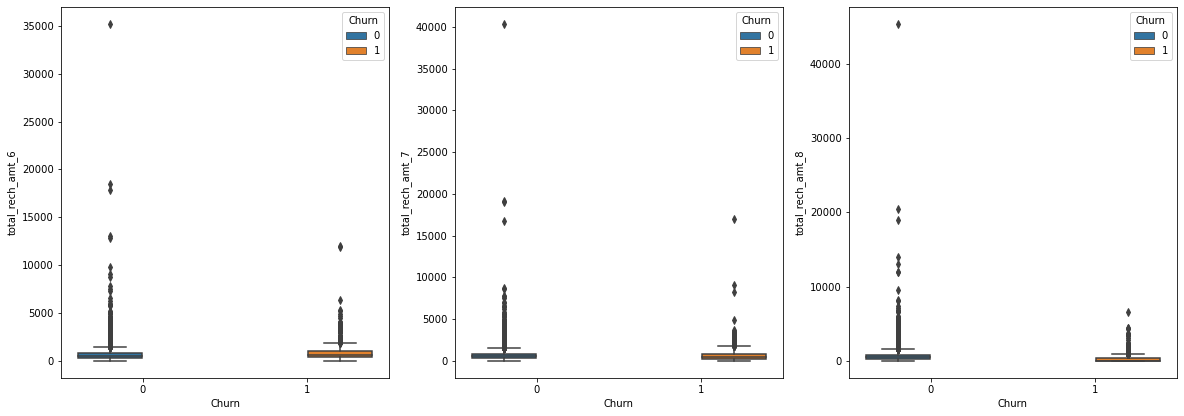

In [60]:
# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')

From above plot it was clear that all three columns have outliers.

In [61]:
dfHVC.total_rech_amt_6.describe()

count    30001.000000
mean       660.732342
std        561.032865
min          0.000000
25%        360.000000
50%        566.000000
75%        834.000000
max      35190.000000
Name: total_rech_amt_6, dtype: float64

### Handling outliers of all numerical columns

In [62]:
# creating numerical columns dataframe
num_df = dfHVC.select_dtypes(include=['int64','float64'])
num_col=num_df.columns
num_col

Index(['arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8',
       ...
       'total_data_rech_amt_6', 'total_data_rech_amt_7',
       'total_data_rech_amt_8', 'amt_data_6', 'amt_data_7', 'amt_data_8',
       'Avg_rch_amt_67', 'Churn', 'tenure', 'avg_arpu_6_7'],
      dtype='object', length=147)

In [63]:
# Importing winsorize for outliers capping
from scipy.stats.mstats import winsorize

In [64]:
# capping outliers on upper side to 98 percentile.
for i in num_col:
    winsorize(dfHVC[i],inplace=True,limits=[0.00, 0.02])


In [65]:
# checking total_rech_amt_6 column after outlier treatment
dfHVC.total_rech_amt_6.describe()

count    30001.000000
mean       642.627079
std        411.316160
min          0.000000
25%        360.000000
50%        566.000000
75%        834.000000
max       1975.000000
Name: total_rech_amt_6, dtype: float64

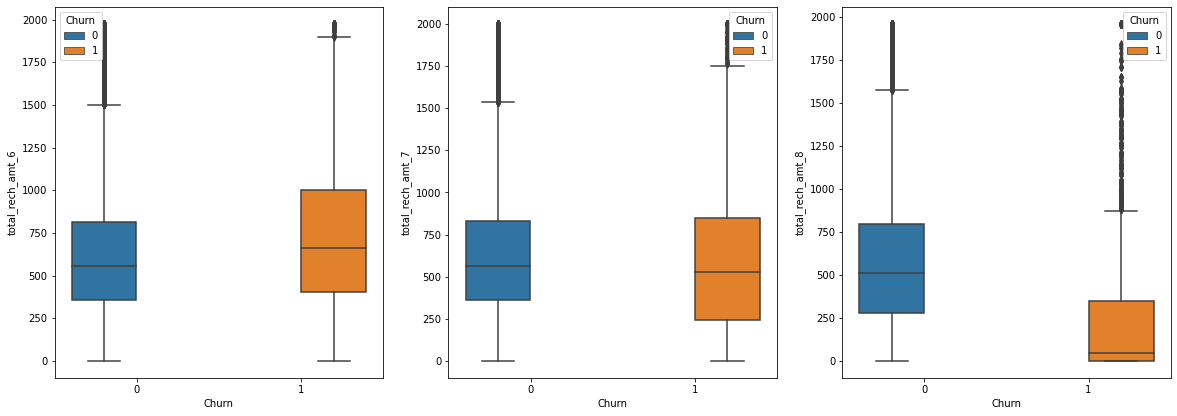

In [66]:
# Ploting again after outlier treatment for total recharge amount:
plot_box_chart('total_rech_amt')

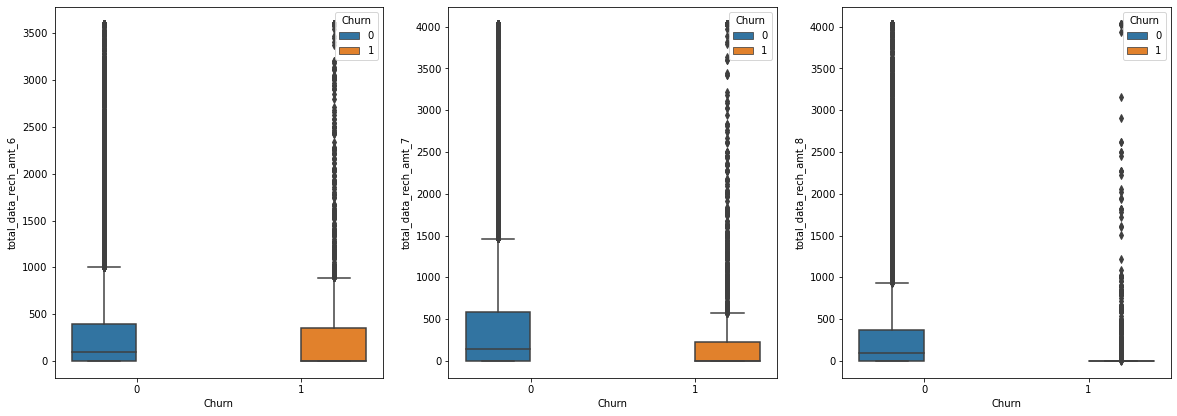

In [67]:
# Ploting for total recharge amount for data:
plot_box_chart('total_data_rech_amt')

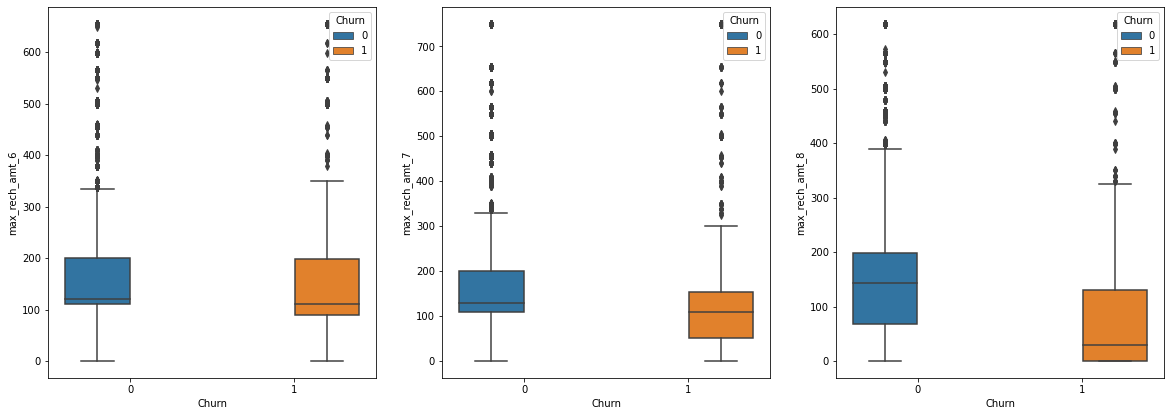

In [68]:
# Ploting for maximum recharge amount for data:
plot_box_chart('max_rech_amt')

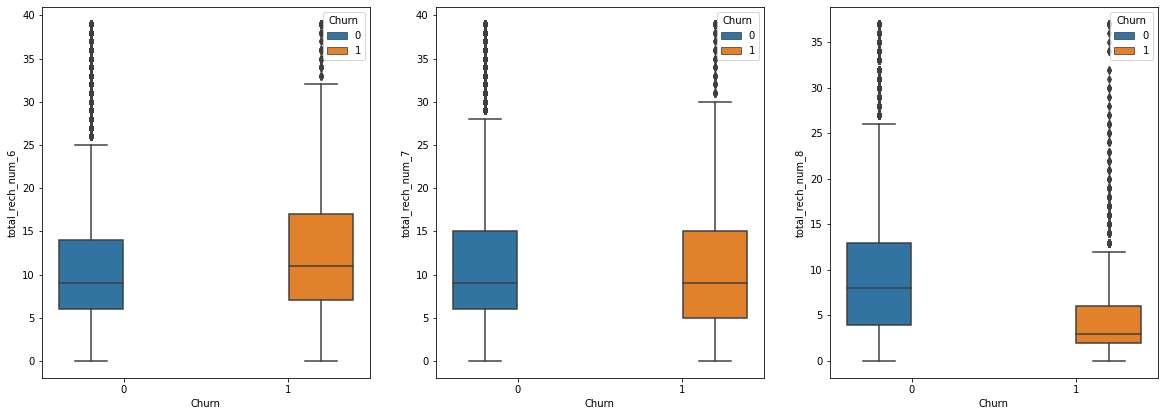

In [69]:
# Ploting for Total recharge for Number:
plot_box_chart('total_rech_num')

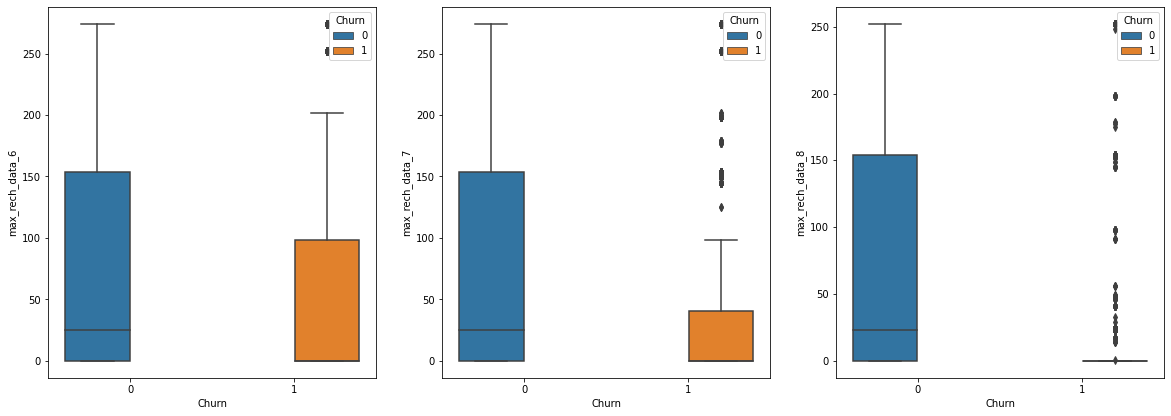

In [70]:
# Ploting for maximum recharge for data:
plot_box_chart('max_rech_data')

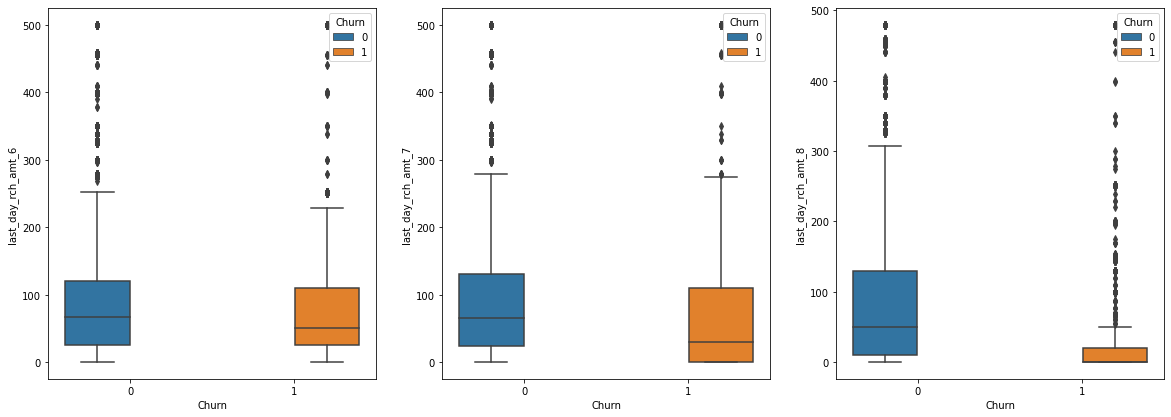

In [71]:
# Ploting for last day recharge amount:
plot_box_chart('last_day_rch_amt')

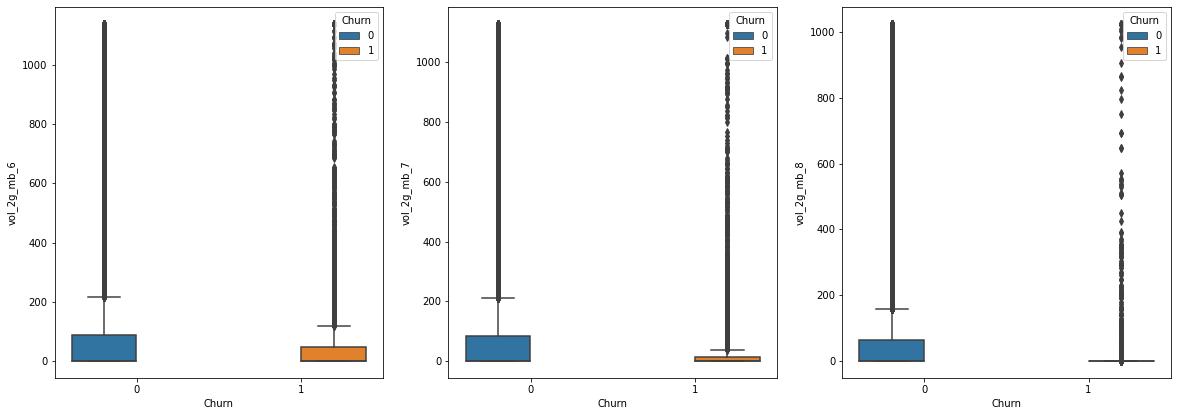

In [72]:
# Ploting for volume of 2G and 3G usage columns:
plot_box_chart('vol_2g_mb')

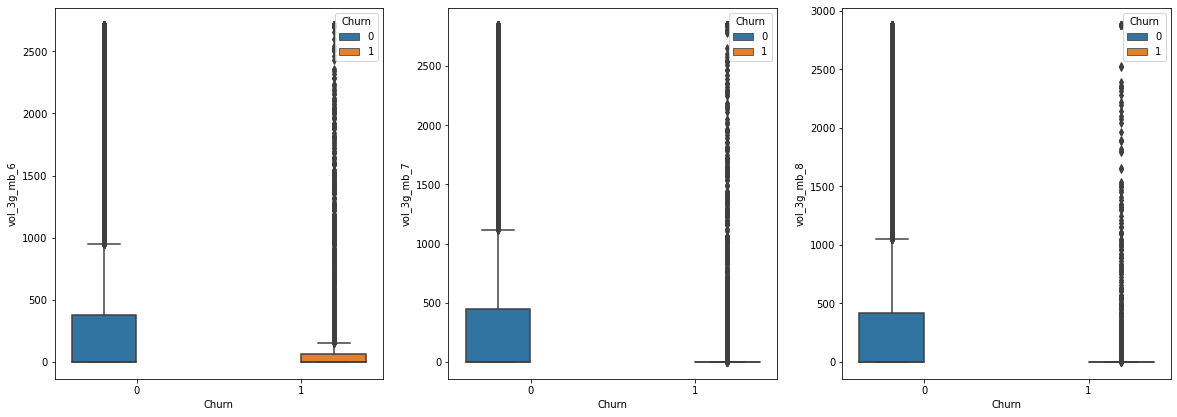

In [73]:
plot_box_chart('vol_3g_mb')

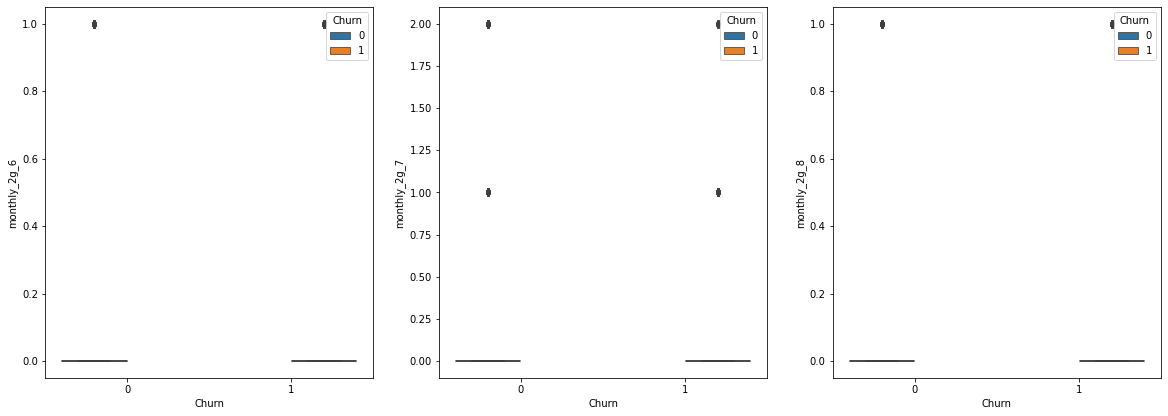

In [74]:
# Ploting for monthly subscription :
plot_box_chart('monthly_2g')

In [75]:
# let's check monthly 2G/3G service schemes
monthly_subcription_2g_3g = dfHVC.columns[dfHVC.columns.str.contains('monthly_2g|monthly_3g',regex=True)]

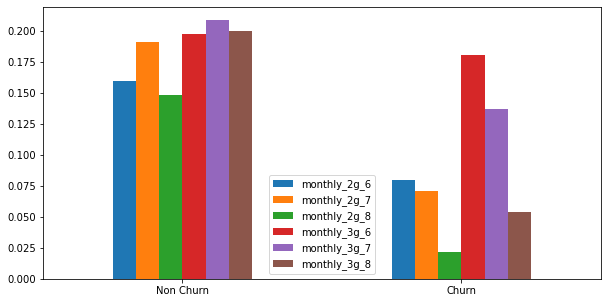

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.160087,0.191437,0.148549,0.197569,0.209071,0.200544
Churn,0.079885,0.070873,0.021712,0.181073,0.136829,0.054076


In [76]:
plot_bar_chart(dfHVC, monthly_subcription_2g_3g)

2G and 3G data usage keep on decreasing for churning people while for non churners it will remain constant

In [77]:
# Renaming month named vbc columns to 6,7,8,9 format
dfHVC.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# drop 9th month column as it is not needed
dfHVC.drop('vbc_3g_9',axis=1,inplace=True)

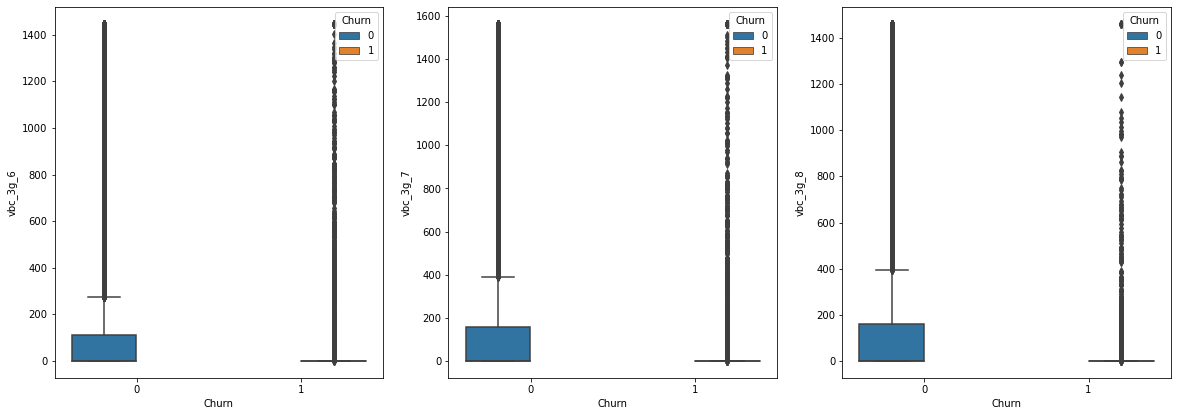

In [78]:
# Ploting for volume based cost :
plot_box_chart('vbc_3g')

In [79]:
vbc_column = dfHVC.columns[dfHVC.columns.str.contains('vbc_3g',regex=True)]

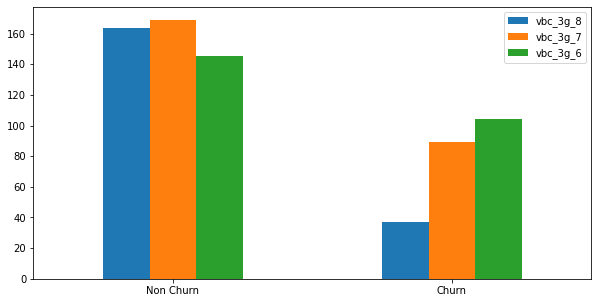

,vbc_3g_8,vbc_3g_7,vbc_3g_6
Non Churn,163.664082,168.888540,145.670203
Churn,37.003941,89.448148,104.572745


In [80]:
plot_bar_chart(dfHVC, vbc_column)

3g data volume usage keep on decreasing for churn customer while it will remain same for non churn people over time

In [81]:
# Checking sachet schemes with validity smaller than a month for 2G/3G
SC_2g_or_3g_col = dfHVC.columns[dfHVC.columns.str.contains('sachet_2g|sachet_3g',regex=True)]

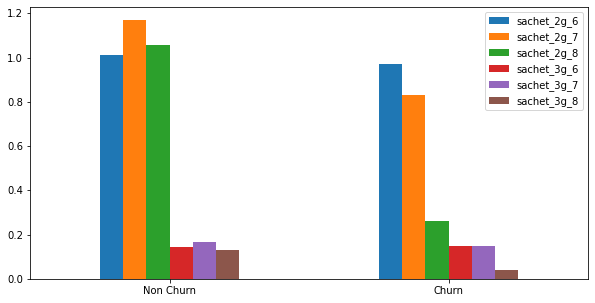

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Non Churn,1.013062,1.169811,1.056713,0.142199,0.168541,0.129427
Churn,0.972552,0.832446,0.261368,0.148710,0.148300,0.039328


In [82]:
plot_bar_chart(dfHVC, SC_2g_or_3g_col)

Non churning people tends to recharge more using sachet and sachet usage of churn people keeps on decreasing

In [83]:
# Creating minutes of usage containing  column dataframe
mou_cols = dfHVC.columns[dfHVC.columns.str.contains('mou')]

In [84]:
# visualizing out going minute of usage columns of 6th month
mou_og_cols6 = dfHVC.columns[dfHVC.columns.str.contains('.*_og_.*mou_6',regex=True)]
dfHVC.loc[:,mou_og_cols6].describe()

,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,total_og_mou_6
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,20.502305,71.211665,154.927864,5.277326,1.267937,241.833754,152.734917,165.601870,1.049948,331.500884,0.340655,4.999183,591.544541
std,64.920981,121.064517,197.204436,11.599037,3.431263,300.590922,322.752396,323.025143,3.826045,524.821910,1.715930,9.700828,607.347224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.930000,20.760000,0.000000,0.000000,34.810000,0.000000,0.000000,0.000000,0.740000,0.000000,0.000000,116.580000
50%,0.000000,24.880000,78.380000,0.150000,0.000000,126.040000,3.330000,17.480000,0.000000,48.190000,0.000000,0.340000,410.630000
75%,0.000000,78.390000,209.260000,4.330000,0.010000,332.740000,111.560000,156.060000,0.000000,467.730000,0.000000,5.310000,858.760000
max,350.780000,621.310000,883.930000,58.630000,17.390000,1361.490000,1456.040000,1507.030000,21.980000,2179.240000,11.060000,46.580000,2579.240000


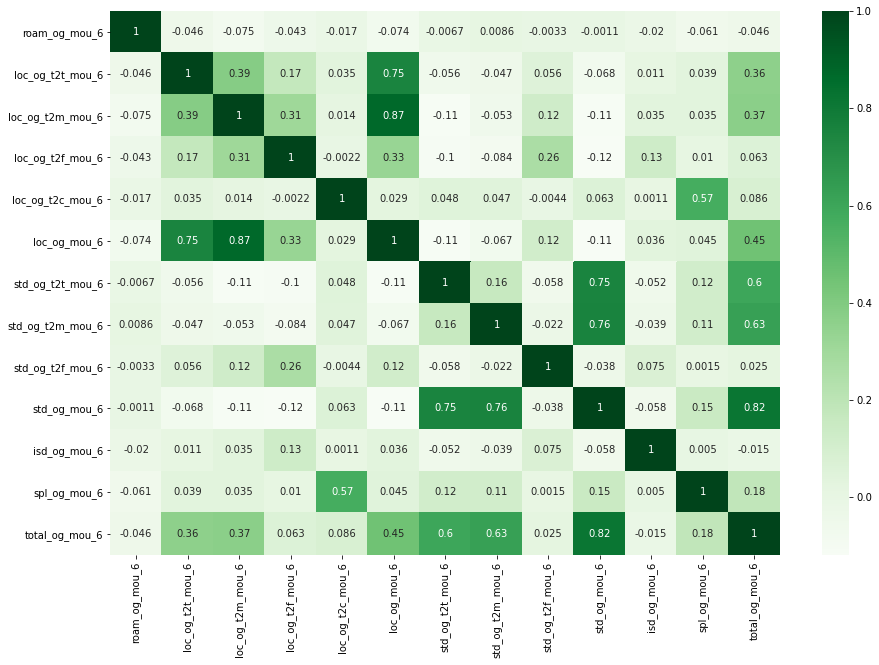

In [85]:
# heatmap for all outgoing minutes of usage column
plt.figure(figsize=[15,10])
sns.heatmap(dfHVC.filter(mou_og_cols6).corr(), annot=True, cmap='Greens')
plt.show()

In [86]:
# dropping total_og_mou, std_og_mou and loc_og_mou columns as these are derived from few varraibles
list_total_og_cols = dfHVC.columns[dfHVC.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
dfHVC.drop(list_total_og_cols,axis=1,inplace=True)

In [87]:
# visualizing incoming minute of usage columns of 6th month
mou_ic_cols6 = dfHVC.columns[dfHVC.columns.str.contains('.*_ic_.*mou_6',regex=True)]
dfHVC.loc[:,mou_ic_cols6].describe()

,roam_ic_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,12.031381,56.366268,142.536492,12.960144,220.680980,10.569484,23.763296,1.670996,39.291582,277.144120,0.058599,6.331134
std,39.167075,82.383575,165.591444,26.127863,245.873647,23.856963,45.617276,5.178821,70.034867,293.808027,0.132831,21.607982
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.693333,29.940000,0.000000,50.273333,0.000000,0.000000,0.000000,1.330000,72.880000,0.000000,0.000000
50%,0.000000,25.410000,84.930000,1.990000,135.560000,0.490000,5.290000,0.000000,11.810000,183.730000,0.000000,0.000000
75%,0.000000,67.610000,189.140000,12.140000,297.310000,8.430000,23.880000,0.190000,41.910000,371.990000,0.000000,0.000000
max,215.180000,409.690000,767.660000,130.730000,1130.110000,124.240000,233.590000,28.680000,354.210000,1346.290000,0.560000,123.290000


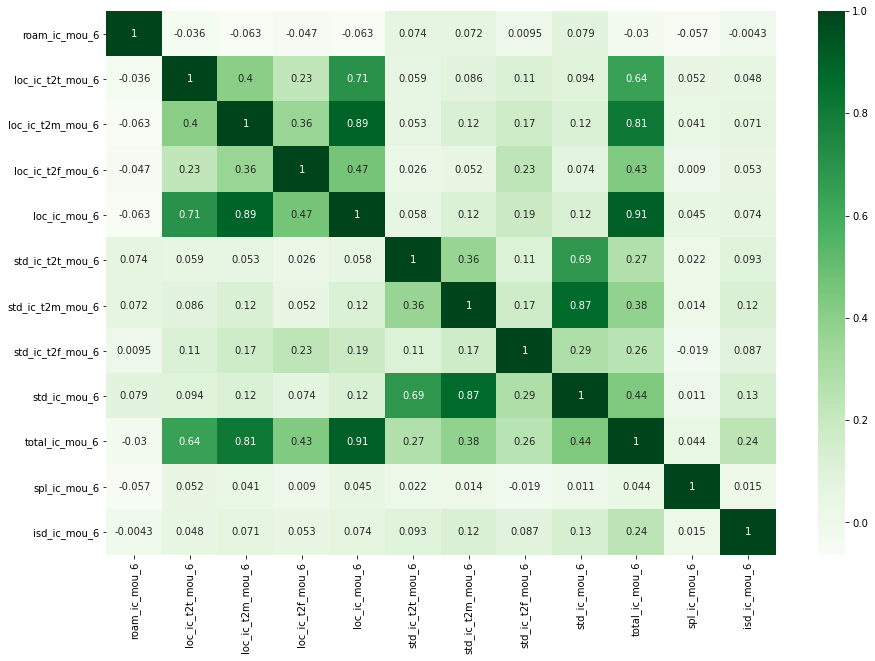

In [88]:
# heatmap for all incoming minutes of usage column
plt.figure(figsize=[15,10])
sns.heatmap(dfHVC.filter(mou_ic_cols6).corr(), annot=True, cmap='Greens')
plt.show()

In [89]:
# dropping total_ic_mou, std_ic_mou and loc_ic_mou columns as these are derived from few varraible
list_total_ic_cols = dfHVC.columns[dfHVC.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
dfHVC.drop(list_total_ic_cols,axis=1,inplace=True)

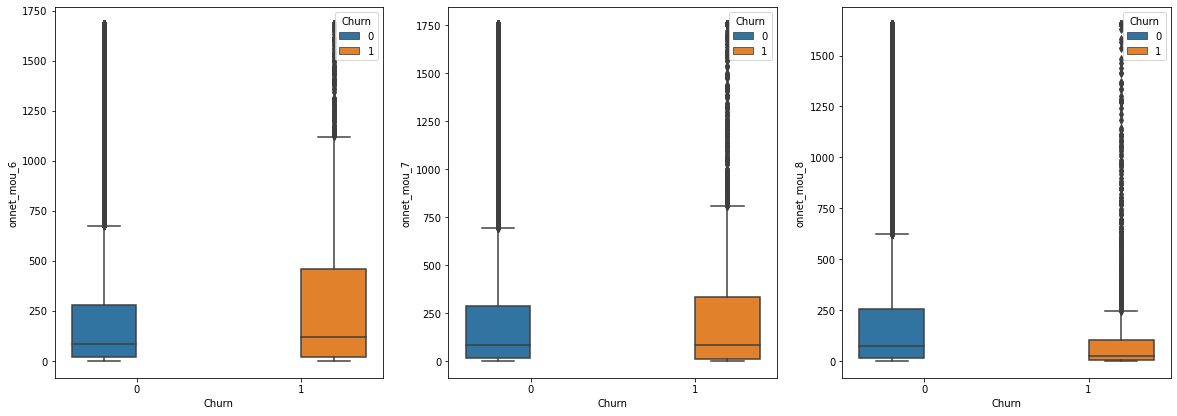

In [90]:
# Plotting onnet mou values for churned and non churned customers
plot_box_chart('onnet_mou')

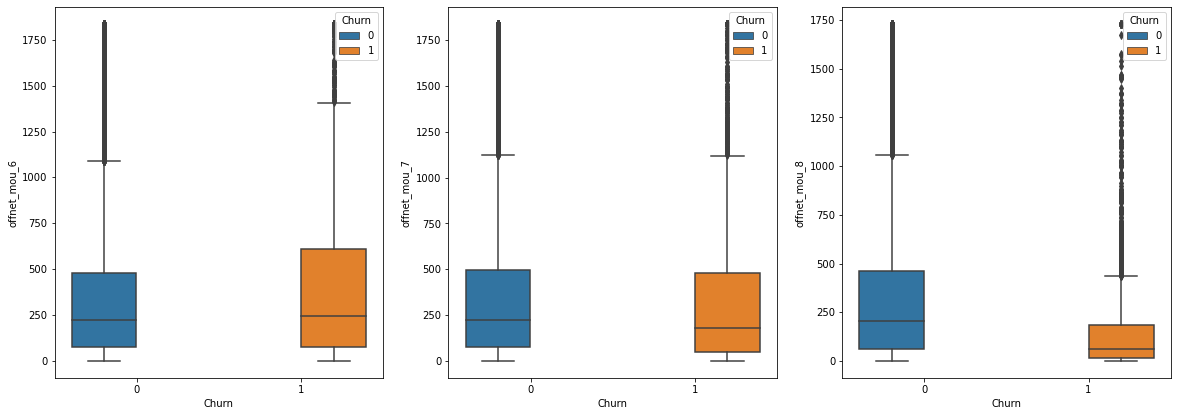

In [91]:
# Offnet mou values for churned and non churned customers
plot_box_chart('offnet_mou')

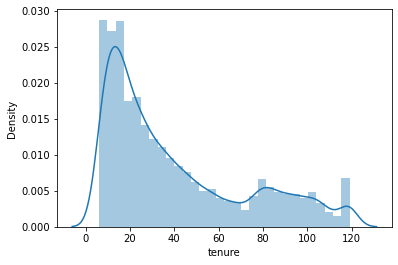

In [92]:
# Checking the distribution of the tenure variable

sns.distplot(dfHVC['tenure'],bins=30)
plt.show()

In [93]:
# classifying tenure varriable in '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above'
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
dfHVC['tenure_range'] = pd.cut(dfHVC['tenure'], tn_range, labels=tn_label)
dfHVC['tenure_range'].head()

0        2-5 Yrs
1        2-5 Yrs
2    6-12 Months
3        1-2 Yrs
4        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

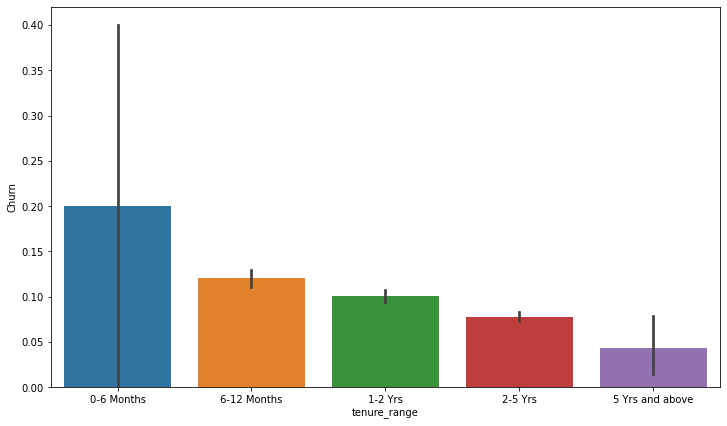

In [94]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='Churn', data=dfHVC)
plt.show()

Old customers have less chance of Churn, newly joined customers have high probability of churn

In [95]:
# dropping tenure varriable
dfHVC.drop(['tenure'],inplace=True, axis=1)

In [96]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(dfHVC[['tenure_range']], drop_first=True)
dummy.head()

,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,1,0,0
4,0,1,0,0


In [97]:
# Adding the results to the master dataframe
dfHVC = pd.concat([dfHVC, dummy], axis=1)
dfHVC.drop(['tenure_range'],inplace=True,axis=1)
dfHVC.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,amt_data_6,amt_data_7,amt_data_8,Avg_rch_amt_67,Churn,avg_arpu_6_7,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,0.00,0.00,0.00,0.41,0.976667,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4.14,0.326667,0.00,0.0,0.0,0.0,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1,206.1005,0,0,1,0
1,1659.130,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380000,40.28,308.63,447.380000,162.28,58.630000,55.140000,53.23,0.000000,0.0,0.00,4.30,23.29,12.01,49.89,31.760000,49.14,6.66,20.08,16.68,0.0,0.18,7.16,4.50,0.000000,6.50,0.0,0.0,0.0,58.140000,32.260000,27.31,217.560000,221.49,121.19,130.73,101.460000,39.53,36.89,11.830000,30.39,91.440000,126.99,141.33,28.680000,29.160000,22.21,0.210000,0.0,0.0,2.06,14.53,31.59,10.39,13.81,11.69,5.0,5.0,7.0,1580.0,790.0,1957.0,655.0,750.0,619.0,0.0,0.0,479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,1,1209.5150,0,0,1,0
2,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590000,12.49,80.96,70.580000,50.54,0.000000,0.000000,0.00,0.000000,0.0,7.15,116.56,133.43,22.58,13.69,10.040000,75.69,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.000000,10.23,0.0,0.0,0.0,23.840000,9.840000,0.31,57.580000,13.98,15.48,0.00,0.000000,0.00,0.00,0.580000,0.10,22.430000,4.08,0.65,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0

In [98]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [99]:
# looking at top 5 rows of our final dataframe
dfHVC.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,amt_data_6,amt_data_7,amt_data_8,Avg_rch_amt_67,Churn,avg_arpu_6_7,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,0.00,0.00,0.00,0.41,0.976667,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4.14,0.326667,0.00,0.0,0.0,0.0,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1,206.1005,0,0,1,0
1,1659.130,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380000,40.28,308.63,447.380000,162.28,58.630000,55.140000,53.23,0.000000,0.0,0.00,4.30,23.29,12.01,49.89,31.760000,49.14,6.66,20.08,16.68,0.0,0.18,7.16,4.50,0.000000,6.50,0.0,0.0,0.0,58.140000,32.260000,27.31,217.560000,221.49,121.19,130.73,101.460000,39.53,36.89,11.830000,30.39,91.440000,126.99,141.33,28.680000,29.160000,22.21,0.210000,0.0,0.0,2.06,14.53,31.59,10.39,13.81,11.69,5.0,5.0,7.0,1580.0,790.0,1957.0,655.0,750.0,619.0,0.0,0.0,479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,1,1209.5150,0,0,1,0
2,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590000,12.49,80.96,70.580000,50.54,0.000000,0.000000,0.00,0.000000,0.0,7.15,116.56,133.43,22.58,13.69,10.040000,75.69,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.000000,10.23,0.0,0.0,0.0,23.840000,9.840000,0.31,57.580000,13.98,15.48,0.00,0.000000,0.00,0.00,0.580000,0.10,22.430000,4.08,0.65,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0

In [100]:
# divide data into X and y
X = dfHVC.drop("Churn", axis = 1)
y = dfHVC.Churn

In [101]:
# shape of dependent and independent varriable
print(X.shape,y.shape)

(30001, 130) (30001,)


In [102]:
# divide data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [103]:
# creating a list of all numeric columns
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [104]:
# scaling all numeric columns using min max scaler
scalar = MinMaxScaler()
X_train[num_col] = scalar.fit_transform(X_train[num_col])

In [105]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,amt_data_6,amt_data_7,amt_data_8,Avg_rch_amt_67,avg_arpu_6_7,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
11785,0.467880,0.003380,0.004713,0.002925,0.082742,0.086494,0.056688,0.134585,0.167210,0.190124,0.017475,0.054431,0.038517,0.008675,0.011828,0.008499,0.024470,0.035311,0.023566,0.020297,0.000000,0.000000,0.0,0.330237,0.058855,0.000000,0.000000,0.000000,0.001732,0.007003,0.009568,0.000000,0.000000,0.0,1.0,1.000000,1.0,0.000000,0.159545,0.022182,0.000000,0.0,0.0,0.037321,0.087729,0.119748,0.174739,0.185828,0.140525,0.054922,0.069009,0.017425,0.000000,0.000000,0.000000,0.074661,0.135704,0.258953,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,1.000000,0.462887,0.0000,0.145547,0.000000,0.205128,0.128205,0.081081,0.749873,0.4460,0.336229,0.607634,0.612000,0.369952,0.796,0.070,0.417537,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.331320,0.175074,0.130426,0.183549,0.760544,0,0,0,0
11987,0.353874,0.086079,0.028372,0.024602,0.174940,0.123820,0.153431,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103749,0.048945,0.071489,0.313871,0.207319,0.251668,0.207061,0.087161,0.612846,0.0,0.851909,0.000000,0.055239,0.012750,0.000000,0.020929,0.012597,0.013919,0.000000,0.335146,0.0,0.0,0.000000,0.0,0.000000,0.308080,0.000000,0.000000,0.0,0.0,0.066953,0.053424,0.095206,0.187401,0.269462,0.322433,0.702670,0.406192,0.109743,0.125805,0.105275,0.000000,0.124492,0.119468,0.100234,1.000000,0.133745,0.000000,0.000000,0.0,0.0,0.422013,0.082117,0.047304,0.6795,0.099928,0.015398,0.205128,0.179487,0.135135,0.291646,0.1965,0.249361,0.167939,0.160000,0.210016,0.220,0.196,0.271399,0.181818,0.272727,0.090909,0.357664,0.357664,0.388889,0.2,0.3,0.1,0.0,0.0,0.0,0.299237,0.209335,0.143485,0.008868,0.126945,0.330877,0.127319,0.050586,0.059488,0.0,0.0,0.0,0.2,0.3,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.125999,0.094421,0.190116,0.108889,0.110119,0.024306,0.216555,0.164279,0.116155,0.109974,0.505664,0,0

In [106]:
# imbalance handling in train data set using Smote
smote = SMOTE(random_state= 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

### Building interpretable Model (without PCA)

In [107]:
# Building rough model with all parameters
logm1 = sm.GLM(y_train_smote,(sm.add_constant(X_train_smote)))
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38489
Model Family:                Gaussian   Df Model:                          128
Link Function:               identity   Scale:                         0.12849
Method:                          IRLS   Log-Likelihood:                -15110.
Date:                Mon, 06 Sep 2021   Deviance:                       4945.1
Time:                        22:51:44   Pearson chi2:                 4.95e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.6870      0.026     26.202      0.000       0.636       0.738
arpu_8                          -0.4919      0.043    -11.403      0.000      -0.576      -0.407
onnet_mou_6                     -0.1716      0.049     -3.487      0.000      -0.268      -0.075
onnet_mou_7                      0.3143      0.060      5.219      0.000       0.196       0.432
onnet_mou_8                     -0.0319      0.060     -0.527      0.598      -0.150       0.087
offnet_mou_6                     0.0378      0.050      0.749      0.454      -0.061       0.137
offnet_mou_7                     0.1600      0.063      2.557      0.011       0.037       0.283
offnet_mou_8                    -0.0643      0.060     -1.070      0.284      -0.182       0.053
roam_ic_mou_6                    0.0254      0.020      1.245      0.213      -0.015       0.065
roam_ic_mou_7                    0.0665      0.021      3.128      0.002       0.025       0.108
roam_ic_mou_8                    0.0265      0.020      1.327      0.185      -0.013       0.066
roam_og_mou_6                   -0.0097      0.022     -0.452      0.652      -0.052       0.032
roam_og_mou_7                   -0.0309      0.022     -1.434      0.152      -0.073       0.011
roam_og_mou_8                    0.2213      0.020     10.987      0.000       0.182       0.261
loc_og_t2t_mou_6                 0.0471      0.033      1.445      0.149      -0.017       0.111
loc_og_t2t_mou_7                -0.1584      0.038     -4.193      0.000      -0.232      -0.084
loc_og_t2t_mou_8                -0.0736      0.036     -2.049      0.040      -0.144      -0.003
loc_og_t2m_mou_6                -0.0290      0.033     -0.886      0.376      -0.093       0.035
loc_og_t2m_mou_7                -0.1860      0.038     -4.921      0.000      -0.260      -0.112
loc_og_t2m_mou_8                -0.0331      0.037     -0.885      0.376      -0.106       0.040
loc_og_t2f_mou_6                -0.0320      0.019     -1.695      0.090      -0.069       0.005
loc_og_t2f_mou_7                -0.0861      0.020     -4.203      0.000      -0.126      -0.046
loc_og_t2f_mou_8                 0.0382      0.020      1.932      0.053      -0.001       0.077
loc_og_t2c_mou_6                -0.0411      0.013     -3.199      0.001      -0.066      -0.016
loc_og_t2c_mou_7                -0.0446      0.014     -3.133      0.002      -0.072      -0.017
loc_og_t2c_mou_8                 0.0389      0.015      2.601      0.009       0.010       0.068
std_og_t2t_mou_6                 0.2357      0.045      5.267      0.000       0.148       0.323
std_og_t2t_mou_7                -0.2410      0.055     -4.363      0.000      -0.349      -0.133
std_og_t2t_mou_8                -0.1361      0.055     -2.458      0.014    

In [108]:
# filtering out most important features using RFE
logreg = LogisticRegression()

#from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train_smote, y_train_smote)

In [109]:
# most important features after applying RFE
rfe_columns=X_train_smote.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_8', 'onnet_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'std_og_t2t_mou_7', 'loc_ic_t2m_mou_8',
       'std_ic_t2f_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'count_rech_2g_8', 'vol_2g_mb_8', 'avg_arpu_6_7',
       'tenure_range_5 Yrs and above'],
      dtype='object')


In [110]:
list(zip(X_train_smote.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', False, 38),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 22),
 ('offnet_mou_6', False, 88),
 ('offnet_mou_7', False, 20),
 ('offnet_mou_8', False, 21),
 ('roam_ic_mou_6', False, 102),
 ('roam_ic_mou_7', False, 91),
 ('roam_ic_mou_8', False, 59),
 ('roam_og_mou_6', False, 90),
 ('roam_og_mou_7', False, 92),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 99),
 ('loc_og_t2t_mou_7', False, 28),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 89),
 ('loc_og_t2m_mou_7', False, 19),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 67),
 ('loc_og_t2f_mou_7', False, 35),
 ('loc_og_t2f_mou_8', False, 65),
 ('loc_og_t2c_mou_6', False, 47),
 ('loc_og_t2c_mou_7', False, 72),
 ('loc_og_t2c_mou_8', False, 70),
 ('std_og_t2t_mou_6', False, 37),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', False, 111),
 ('std_og_t2m_mou_6', False, 87),
 ('std_og_t2m_mou_7', False, 68),
 ('std_og_t2m_mou_8', False, 69),
 ('std_og_t

In [111]:
# Building next model with top 15 features
X_train_smote = sm.add_constant(X_train_smote[rfe_columns])
logm2 = sm.GLM(y_train_smote,X_train_smote)
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38602
Model Family:                Gaussian   Df Model:                           15
Link Function:               identity   Scale:                         0.14156
Method:                          IRLS   Log-Likelihood:                -17039.
Date:                Mon, 06 Sep 2021   Deviance:                       5464.6
Time:                        22:52:40   Pearson chi2:                 5.46e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.5777      0.009     61.056      0.000       0.559       0.596
arpu_8                          -0.7790      0.020    -39.426      0.000      -0.818      -0.740
onnet_mou_7                      0.1357      0.032      4.269      0.000       0.073       0.198
roam_og_mou_8                    0.3260      0.010     31.715      0.000       0.306       0.346
loc_og_t2t_mou_8                -0.2812      0.020    -13.924      0.000      -0.321      -0.242
loc_og_t2m_mou_8                -0.1056      0.016     -6.564      0.000      -0.137      -0.074
std_og_t2t_mou_7                -0.1170      0.029     -3.996      0.000      -0.174      -0.060
loc_ic_t2m_mou_8                -0.3702      0.015    -25.375      0.000      -0.399      -0.342
std_ic_t2f_mou_8                -0.1919      0.014    -13.667      0.000      -0.219      -0.164
spl_ic_mou_8                    -0.2148      0.013    -16.270      0.000      -0.241      -0.189
total_rech_num_8                -0.3908      0.014    -27.359      0.000      -0.419      -0.363
last_day_rch_amt_8              -0.4684      0.012    -38.177      0.000      -0.492      -0.444
count_rech_2g_8                 -0.3464      0.013    -26.053      0.000      -0.372      -0.320
vol_2g_mb_8                     -0.3095      0.013    -24.172      0.000      -0.335      -0.284
avg_arpu_6_7                     0.7777      0.020     39.634      0.000       0.739       0.816
tenure_range_5 Yrs and above    -0.2226      0.038     -5.901      0.000      -0.296      -0.149
================================================================================================
"""

In [112]:
# importing liberaries for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
# VIF calculation 
vif = pd.DataFrame()
vif['Features'] = X_train_smote[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_smote[rfe_columns].values, i) for i in range(X_train_smote[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,onnet_mou_7,19.34
0,arpu_8,16.53
5,std_og_t2t_mou_7,15.75
13,avg_arpu_6_7,7.79
9,total_rech_num_8,4.32
3,loc_og_t2t_mou_8,3.46
4,loc_og_t2m_mou_8,3.25
6,loc_ic_t2m_mou_8,2.89
10,last_day_rch_amt_8,2.21
11,count_rech_2g_8,1.66


In [114]:
# Dropping onnet_mou_7 as it has very high VIF
rfe_columns = rfe_columns.drop('onnet_mou_7', 1)

In [115]:
# Again building model with top 14 features
X_train_smote = sm.add_constant(X_train_smote[rfe_columns])
logm3 = sm.GLM(y_train_smote,X_train_smote, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38603
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15640.
Date:                Mon, 06 Sep 2021   Deviance:                       31280.
Time:                        22:52:41   Pearson chi2:                 6.63e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.4327      0.073      5.916      0.000       0.289       0.576
arpu_8                          -4.8682      0.163    -29.844      0.000      -5.188      -4.548
roam_og_mou_8                    2.0296      0.080     25.502      0.000       1.874       2.186
loc_og_t2t_mou_8                -1.7474      0.139    -12.554      0.000      -2.020      -1.475
loc_og_t2m_mou_8                -1.7910      0.166    -10.807      0.000      -2.116      -1.466
std_og_t2t_mou_7                -0.0122      0.069     -0.178      0.859      -0.147       0.123
loc_ic_t2m_mou_8                -3.3497      0.162    -20.643      0.000      -3.668      -3.032
std_ic_t2f_mou_8                -1.7586      0.139    -12.640      0.000      -2.031      -1.486
spl_ic_mou_8                    -1.8039      0.121    -14.849      0.000      -2.042      -1.566
total_rech_num_8                -2.7090      0.119    -22.709      0.000      -2.943      -2.475
last_day_rch_amt_8              -2.8819      0.098    -29.426      0.000      -3.074      -2.690
count_rech_2g_8                 -2.8371      0.139    -20.393      0.000      -3.110      -2.564
vol_2g_mb_8                     -2.9247      0.148    -19.791      0.000      -3.214      -2.635
avg_arpu_6_7                     5.3074      0.162     32.679      0.000       4.989       5.626
tenure_range_5 Yrs and above    -2.2996      0.443     -5.189      0.000      -3.168      -1.431
================================================================================================
"""

In [116]:
# Looking at VIF of all remaining columns
vif = pd.DataFrame()
vif['Features'] = X_train_smote[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_smote[rfe_columns].values, i) for i in range(X_train_smote[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,16.40
12,avg_arpu_6_7,7.60
8,total_rech_num_8,4.32
3,loc_og_t2m_mou_8,3.22
5,loc_ic_t2m_mou_8,2.89
9,last_day_rch_amt_8,2.21
2,loc_og_t2t_mou_8,1.66
10,count_rech_2g_8,1.66
4,std_og_t2t_mou_7,1.51
11,vol_2g_mb_8,1.35


All p values are below 0.05 and VIF of all varriable was low hence we can use this as our final model

In [117]:
# predicting y_train using final model
y_train_pred = logm3.fit().predict(X_train_smote)
y_train_pred[:10]

0    0.579064
1    0.065266
2    0.488410
3    0.023466
4    0.401694
5    0.122782
6    0.092122
7    0.275019
8    0.286376
9    0.503791
dtype: float64

In [118]:
# Creating y_train_pred_final for further evaluation
y_train_pred_final = pd.DataFrame({'Churn':y_train_smote.values, 'Churn_prob':y_train_pred.values})
y_train_pred_final.head()

,Churn,Churn_prob
0,0,0.579064
1,0,0.065266
2,0,0.488410
3,0,0.023466
4,0,0.401694


In [119]:
# Predicting churn based on 0.5 cutoff(default)
y_train_pred_final['Predicted'] = y_train_pred_final['Churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,Predicted
0,0,0.579064,1
1,0,0.065266,0
2,0,0.488410,0
3,0,0.023466,0
4,0,0.401694,0


In [120]:
# Building confusion matrix for above predictions
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted)
print(confusion)

[[15633  3676]
 [ 2859 16450]]


In [121]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [122]:
# Calculating accuracy and sensitivity
print("Accuracy Score is:", metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))
print("Sensitivity Score is:", TP / float(TP+FN))

Accuracy Score is: 0.8307783934952613
Sensitivity Score is: 0.8519343311409188


In [123]:
# calculating other evaluation matrices
print("Sensitivity Score is:", round(TP / float(TP+FN), 2))
print("Specificity Score is:", round(TN / float(TN+FP), 2))
print ("Positive predictive value is:", round(TP / float(TP+FP), 2))
print ("Negative predictive value is:", round(TN / float(TN+ FN), 2))
print("False postive rate is:", round(FP/ float(TN+FP), 2))

Sensitivity Score is: 0.85
Specificity Score is: 0.81
Positive predictive value is: 0.82
Negative predictive value is: 0.85
False postive rate is: 0.19


In [124]:
y_train_pred_final_optimized = y_train_pred_final.copy()

### Model Evaluation

###  Plotting the ROC Curve

In [125]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [126]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Churn, 
                                         y_train_pred_final.Churn_prob, drop_intermediate=False)

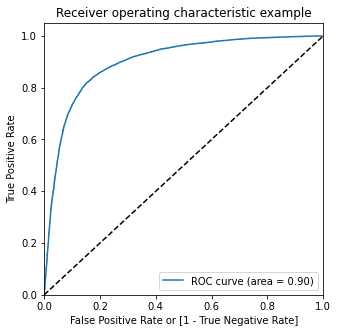

In [127]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

### Finding Optimal Cutoff Point

Optimal cutoff point is that probability where we get balanced accuracy, sensitivity and specificity

- Let's start by creating columns with different probability cutoffs 

In [128]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.579064,1,1,1,1,1,1,1,0,0,0,0
1,0,0.065266,0,1,0,0,0,0,0,0,0,0,0
2,0,0.488410,0,1,1,1,1,1,0,0,0,0,0
3,0,0.023466,0,1,0,0,0,0,0,0,0,0,0
4,0,0.401694,0,1,1,1,1,1,0,0,0,0,0


Now let's calculate accuracy, sensitivity, and specificity for various probability cutoffs.

In [129]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.694262  0.974986  0.413538
0.2   0.2  0.756487  0.952768  0.560205
0.3   0.3  0.793231  0.925631  0.660832
0.4   0.4  0.816355  0.891294  0.741416
0.5   0.5  0.830778  0.851934  0.809622
0.6   0.6  0.831478  0.802683  0.860272
0.7   0.7  0.813999  0.724740  0.903258
0.8   0.8  0.759646  0.575379  0.943912
0.9   0.9  0.626910  0.273603  0.980216


- Let's plot accuracy, sensitivity, and specificity for various probabilities.

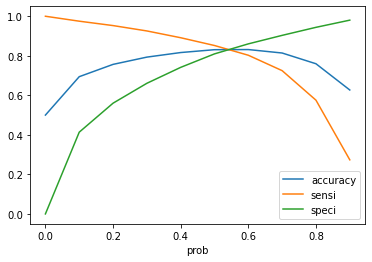

In [130]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- The optimal cut-off seems to be around 0.5 i.e. between 0.5 to 0.6. Let's calculate our evaluation metrics for these values as well.

In [131]:
numbers = [float(x)/100 for x in range(50,60)]
for i in numbers:
    y_train_pred_final_optimized[i]= y_train_pred_final_optimized.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_optimized.head()

,Churn,Churn_prob,Predicted,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.579064,1,1,1,1,1,1,1,1,1,0,0
1,0,0.065266,0,0,0,0,0,0,0,0,0,0,0
2,0,0.488410,0,0,0,0,0,0,0,0,0,0,0
3,0,0.023466,0,0,0,0,0,0,0,0,0,0,0
4,0,0.401694,0,0,0,0,0,0,0,0,0,0,0


- Let's calculate accuracy, sensitivity and specificity for various probability cutoffs from 0.5 to 0.6

In [132]:
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

num = [0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_optimized.Churn, y_train_pred_final_optimized[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.50  0.50  0.830778  0.851934  0.809622
0.51  0.51  0.831089  0.847688  0.814491
0.52  0.52  0.832021  0.844270  0.819773
0.53  0.53  0.832772  0.839971  0.825574
0.54  0.54  0.832436  0.834533  0.830338
0.55  0.55  0.832410  0.829354  0.835465
0.56  0.56  0.832669  0.824434  0.840903
0.57  0.57  0.832928  0.819618  0.846238
0.58  0.58  0.833187  0.815060  0.851313
0.59  0.59  0.832306  0.808897  0.855715


From above table we can say that 0.54 is our optimal cutoff as all three are equal

In [133]:
# Final predicting with optimal cutoff i.e., 0.54
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_prob.map( lambda x: 1 if x > 0.54 else 0)

y_train_pred_final.head()

,Churn,Churn_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.579064,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.065266,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.488410,0,1,1,1,1,1,0,0,0,0,0,0
3,0,0.023466,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.401694,0,1,1,1,1,1,0,0,0,0,0,0


- Now, let's calculate the evaluation metrics to compare them with the same obtained our final model

In [134]:
print("Accuracy Score is:", metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted))

Accuracy Score is: 0.8324356517686053


In [135]:
confusionFinal = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted)
print(confusionFinal)

[[16033  3276]
 [ 3195 16114]]


In [136]:
TP = confusionFinal[1,1] # true positive 
TN = confusionFinal[0,0] # true negatives
FP = confusionFinal[0,1] # false positives
FN = confusionFinal[1,0] # false negatives

In [137]:
# calculating evaluation matrices
print("Sensitivity Score is:", round(TP / float(TP+FN), 2))
print("Specificity Score is:", round(TN / float(TN+FP), 2))
print ("Positive predictive value is:", round(TP / float(TP+FP), 2))
print ("Negative predictive value is:", round(TN / float(TN+ FN), 2))
print("False postive rate is:", round(FP/ float(TN+FP), 2))

Sensitivity Score is: 0.83
Specificity Score is: 0.83
Positive predictive value is: 0.83
Negative predictive value is: 0.83
False postive rate is: 0.17


Before the optimization using the cut-off

- Sensitivity Score is: 0.85
- Specificity Score is: 0.81
- Positive predictive value is: 0.82
- Negative predictive value is: 0.85
- False postive rate is: 0.19
    
After the optimization

- Sensitivity Score is: 0.83
- Specificity Score is: 0.83
- Positive predictive value is: 0.83
- Negative predictive value is: 0.83
- False postive rate is: 0.17

We see an improvement in the metrics as expected.

### Precision-Recall Curve

- Importing the required library for calculating the P-R score

In [138]:
from sklearn.metrics import precision_score, recall_score

- Calculating the precision and recall score

In [139]:
print("The Precision Score is:", precision_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted))
print("The Recall Score is:", recall_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted))

The Precision Score is: 0.8310469314079423
The Recall Score is: 0.8345331192708063


- Importing the required library for plotting the P-R curve

In [140]:
from sklearn.metrics import precision_recall_curve

In [141]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

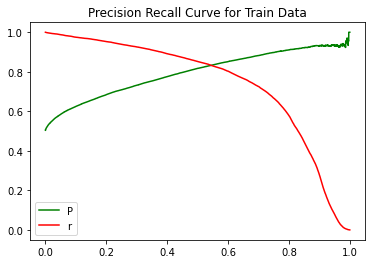

In [142]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title("Precision Recall Curve for Train Data")
plt.legend('Precision')
plt.show()

### Making predictions on the test set :

- Separating the numerical data types into a different dataframe for scaling

In [143]:
# scaling all numeric columns
nums = X_test.select_dtypes(include=['int64','float64']).columns
X_test[nums] = scalar.transform(X_test[nums])

- Importing the columns extracted under train set modeling to create our test dataframe, and modeling it

In [144]:
# updating test set for only RFE columns and adding constant to it
X_test = X_test[rfe_columns]
X_test_sm=sm.add_constant(X_test)

- Predicting the target variable of our test data using the same model

In [145]:
# predicting probability on test set
y_test_pred = logm3.fit().predict(X_test_sm)
y_test_pred[:10]

6102     0.640817
2539     0.477294
21576    0.016559
19574    0.120058
12804    0.910780
24030    0.080201
20273    0.150927
7538     0.145028
3196     0.261968
12935    0.179171
dtype: float64

In [146]:
# creating dataframe for further evaluation
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_prob':y_test_pred.values})
y_test_pred_final.head()

,Churn,Churn_prob
0,1,0.640817
1,1,0.477294
2,0,0.016559
3,0,0.120058
4,1,0.910780


- Let us now use the same threshold probability of 0.54 obtained earlier and create a 'final_predicted' column based on the predicted values

In [147]:
# predicting Churn using 0.54 cutoff
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_prob.map( lambda x: 1 if x > 0.54 else 0)
y_test_pred_final.head()

,Churn,Churn_prob,final_predicted
0,1,0.640817,1
1,1,0.477294,0
2,0,0.016559,0
3,0,0.120058,0
4,1,0.910780,1


- Moving on to building the confusion matrix for model evaluation metrics calculation :

In [148]:
print("Accuracy Score is:", metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.final_predicted))

Accuracy Score is: 0.8356849238973447


In [149]:
confusionTestFinal = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.final_predicted)
print(confusionTestFinal)

[[6928 1323]
 [ 156  594]]


- We will now obtain the true positives/negatives and false positives/negatives into variables to calculate Accuracy, Sensitivity and other metrics :

In [150]:
TP = confusionTestFinal[1,1] # true positive 
TN = confusionTestFinal[0,0] # true negatives
FP = confusionTestFinal[0,1] # false positives
FN = confusionTestFinal[1,0] # false negatives

In [151]:
print("Sensitivity Score is:", round(TP / float(TP+FN), 2))
print("Specificity Score is:", round(TN / float(TN+FP), 2))
print ("Positive predictive value is:", round(TP / float(TP+FP), 2))
print ("Negative predictive value is:", round(TN / float(TN+ FN), 2))
print("False postive rate is:", round(FP/ float(TN+FP), 2))

Sensitivity Score is: 0.79
Specificity Score is: 0.84
Positive predictive value is: 0.31
Negative predictive value is: 0.98
False postive rate is: 0.16


### Plotting the ROC curve for Test data

In [152]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_final.Churn, 
                                         y_test_pred_final.Churn_prob, drop_intermediate = False)

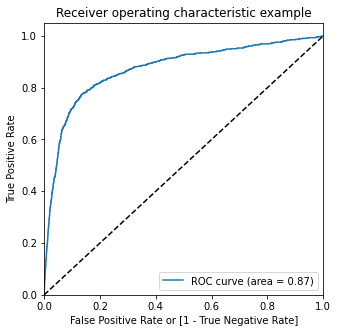

In [153]:
draw_roc(y_test_pred_final.Churn, y_test_pred_final.Churn_prob)

## High performance model (using PCA)

Preparing  data for model building

In [154]:
# split the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

# apply scaling on the dataset
num_col=X_train.select_dtypes(include = ['int64','float64']).columns.tolist()
scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

# Applying SMOTE technique for data imbalance correction

smote = SMOTE(random_state=42)
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train: (21000, 130)
Dimension of X_test: (9001, 130)
Dimension of X_train_sm Shape: (38576, 130)
Dimension of y_train_sm Shape: (38576,)


,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,amt_data_6,amt_data_7,amt_data_8,Avg_rch_amt_67,avg_arpu_6_7,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,0.268862,0.001028,0.002465,0.001547,0.019181,0.019196,0.033159,0.0,0.000000,0.0,0.0,0.0,0.0,0.002784,0.006930,0.004495,0.037480,0.032575,0.064333,0.035477,0.000000,0.016146,0.000000,0.306502,0.126271,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.132114,0.047590,0.000000,0.0,0.0,0.068442,0.080311,0.128370,0.091095,0.068120,0.107491,0.013845,0.046833,0.000000,0.00000,0.000000,0.000000,0.026157,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.076923,0.179487,0.081081,0.118481,0.1245,0.129790,0.235115,0.205333,0.248788,0.308,0.308,0.321503,0.090909,0.272727,0.090909,0.562044,0.562044,0.611111,0.1,0.3,0.1,0.0,0.00,0.00,0.235115,0.288543,0.225476,0.030436,0.184755,0.176254,0.000000,0.000000,0.000000,1.0,0.5,1.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.042778,0.151786,0.038194,0.086801,0.168989,0.080872,0.037953,0.407926,0,0,0,0
1,0.227512,0.002163,0.000000,0.000000,0.007430,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.005859,0.000000,0.000000,0.013553,0.000000,0.000000,0.028313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.202910,0.099778,0.038020,0.254488,0.119302,0.085695,0.169663,0.122148,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.073045,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.435897,0.384615,0.216216,0.155443,0.1630,0.065917,0.056489,0.049333,0.059774,0.074,0.048,0.052192,0.636364,0.545455,0.545455,0.091241,0.091241,0.099206,0.7,0.4,0.6,0.0,0.50,0.00,0.166412,0.196605,0.207906,0.581881,0.318427,0.289380,0.005596,0.000000,0.000000,0.0,0.0,0.0,0.7,0.4,0.6,0.0,0.0,0.0,0.0,0.666667,0.0,0.000000,0.0,0.0,0.211944,0.206845,0.211310,0.239374,0.227674,0.194450,0.165026,0.443217,0,0,1,0
2,0.233764,0.003838,0.001275,0.004641,0.017590,0.039361,0.029789,0.0,0.000000,0.0,0.0,0.0,0.0,0.0

### Applying PCA on data

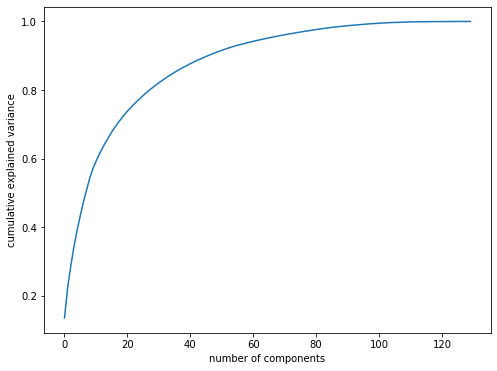

,PC1,PC2,PC3,Feature
0,0.026401,0.176055,0.145249,arpu_8
1,-0.116317,0.061678,0.066228,onnet_mou_6
2,-0.095402,0.080341,0.101738,onnet_mou_7
3,-0.050348,0.088020,0.109510,onnet_mou_8
4,-0.112772,0.129238,0.083192,offnet_mou_6
5,-0.094361,0.153852,0.131628,offnet_mou_7
6,-0.035701,0.155355,0.139571,offnet_mou_8
7,-0.016051,0.039885,-0.032934,roam_ic_mou_6
8,-0.024522,0.035990,-0.048450,roam_ic_mou_7
9,-0.028744,0.044001,-0.024858,roam_ic_mou_8


In [155]:
 # scree plot
pca = PCA( random_state=42)
pca.fit(X_train_sm)

fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

col = list(X_train_sm.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

In [156]:
pca.explained_variance_

array([7.11076863e-01, 4.63631993e-01, 3.33119147e-01, 2.98677402e-01,
       2.49316358e-01, 2.22213936e-01, 2.10338254e-01, 1.85176945e-01,
       1.77496420e-01, 1.52610144e-01, 1.11097967e-01, 1.04570581e-01,
       9.48995982e-02, 8.90548977e-02, 8.21957160e-02, 8.15188581e-02,
       7.33488220e-02, 6.75842079e-02, 6.29831333e-02, 6.09641206e-02,
       5.55412533e-02, 5.22519185e-02, 5.06064667e-02, 4.80063854e-02,
       4.53258858e-02, 4.43660612e-02, 4.31763205e-02, 4.09228255e-02,
       3.87177312e-02, 3.68154554e-02, 3.59935740e-02, 3.50761887e-02,
       3.34482836e-02, 3.19907186e-02, 3.10589226e-02, 2.93059522e-02,
       2.84489150e-02, 2.76081216e-02, 2.61383722e-02, 2.54781963e-02,
       2.52310804e-02, 2.43835295e-02, 2.30976849e-02, 2.16594825e-02,
       2.11309689e-02, 2.04424037e-02, 2.01453488e-02, 2.00625218e-02,
       1.88987657e-02, 1.82176318e-02, 1.76471585e-02, 1.72849327e-02,
       1.59344044e-02, 1.57687264e-02, 1.43063787e-02, 1.39756572e-02,
      

In [157]:
# variance explained by new variables
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [13.5  8.8  6.3  5.7  4.7  4.2  4.   3.5  3.4  2.9  2.1  2.   1.8  1.7
  1.6  1.5  1.4  1.3  1.2  1.2  1.1  1.   1.   0.9  0.9  0.8  0.8  0.8
  0.7  0.7  0.7  0.7  0.6  0.6  0.6  0.6  0.5  0.5  0.5  0.5  0.5  0.5
  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.3  0.3  0.3  0.3  0.3  0.3  0.3
  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0. ]


In [158]:
# cumulative sum of variance explained
print (pca.explained_variance_ratio_.cumsum())

[0.13503284 0.22307613 0.28633515 0.34305372 0.39039866 0.43259689
 0.47253993 0.50770486 0.54141127 0.57039179 0.59148919 0.61134705
 0.6293684  0.64627984 0.66188873 0.67736909 0.69129796 0.70413214
 0.71609258 0.72766961 0.73821684 0.74813943 0.75774956 0.76686592
 0.77547327 0.78389834 0.79209749 0.79986869 0.80722115 0.81421238
 0.82104752 0.82770846 0.83406026 0.84013526 0.84603332 0.8515985
 0.85700092 0.86224368 0.86720733 0.87204562 0.87683698 0.88146739
 0.88585361 0.88996673 0.89397948 0.89786148 0.90168706 0.90549691
 0.90908577 0.91254528 0.91589646 0.91917886 0.92220478 0.92519925
 0.92791602 0.93056998 0.93296454 0.93529307 0.937613   0.93989561
 0.94210851 0.94425689 0.94636672 0.94838507 0.95035954 0.95229236
 0.95416798 0.95599196 0.95777462 0.95949666 0.96119176 0.96286224
 0.96449625 0.96609684 0.96766626 0.96920298 0.9707172  0.97218762
 0.97363914 0.97506929 0.97647303 0.97784146 0.97916921 0.98045991
 0.98164246 0.9827789  0.98381356 0.98481971 0.98577693 0.98669

In [159]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([13.5 , 22.3 , 28.63, 34.3 , 39.03, 43.25, 47.24, 50.76, 54.13,
       57.03, 59.14, 61.13, 62.93, 64.62, 66.18, 67.73, 69.12, 70.4 ,
       71.6 , 72.76, 73.81, 74.8 , 75.76, 76.67, 77.53, 78.37, 79.19,
       79.97, 80.71, 81.41, 82.09, 82.76, 83.4 , 84.01, 84.6 , 85.16,
       85.7 , 86.22, 86.72, 87.2 , 87.68, 88.14, 88.58, 88.99, 89.39,
       89.78, 90.16, 90.54, 90.9 , 91.25, 91.59, 91.92, 92.22, 92.52,
       92.79, 93.06, 93.3 , 93.53, 93.76, 93.99, 94.21, 94.42, 94.63,
       94.83, 95.03, 95.22, 95.41, 95.59, 95.77, 95.94, 96.11, 96.28,
       96.44, 96.6 , 96.76, 96.91, 97.06, 97.21, 97.36, 97.5 , 97.64,
       97.78, 97.91, 98.04, 98.16, 98.27, 98.37, 98.47, 98.57, 98.66,
       98.75, 98.84, 98.92, 99.  , 99.08, 99.16, 99.23, 99.3 , 99.36,
       99.42, 99.48, 99.54, 99.59, 99.64, 99.68, 99.71, 99.74, 99.77,
       99.8 , 99.83, 99.85, 99.87, 99.89, 99.9 , 99.91, 99.92, 99.93,
       99.94, 99.95, 99.96, 99.97, 99.98, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99,

### 65 componenets explians 95% varriance

In [160]:
# applying PCA with 65 components
pca = PCA(n_components=65,random_state=42)
#Scale and transform data to get Principal Components
x_train_pca = pca.fit_transform(X_train_sm)
x_test_pca = pca.transform(X_test)

In [161]:
# looking at shape of train and test data set
x_train_pca.shape

(38576, 65)

In [162]:
x_test_pca.shape

(9001, 65)

### Model Building

### Decision Tree

In [163]:
# Importing liberaries
from sklearn.tree import DecisionTreeClassifier

In [164]:
# building deafult model with depth 5
dt_base = DecisionTreeClassifier(random_state=42, max_depth=5)

In [165]:
# fitting model on train data
dt_base.fit(x_train_pca, y_train_sm)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [166]:
# predicting on train and test data with default model
y_train_pred = dt_base.predict(x_train_pca)
y_test_pred = dt_base.predict(x_test_pca)

In [167]:
from sklearn.metrics import classification_report

In [168]:
# looking at classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      8272
           1       0.23      0.65      0.34       729

    accuracy                           0.79      9001
   macro avg       0.60      0.73      0.61      9001
weighted avg       0.90      0.79      0.83      9001



#### Plot the ROC curve

In [169]:
from sklearn.metrics import plot_roc_curve

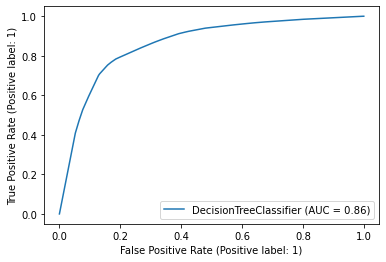

In [170]:
plot_roc_curve(dt_base, x_train_pca, y_train_sm, drop_intermediate=False)
plt.show()

#### Hyper-parameter tuning for the Decision Tree

In [171]:
# importing grid search for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

In [172]:
dt = DecisionTreeClassifier(random_state=42)

In [173]:
# parameter grid for tuning
params = {
    "max_depth": [5,10,20,25,50],
    "min_samples_leaf": [2,5,10,20],
    "min_samples_split": [2,5,10,20]       
}

In [174]:
# preparing grid search for tunning
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [176]:
# applying grid search on data

grid_search.fit(x_train_pca, y_train_sm)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 25, 50],
                         'min_samples_leaf': [2, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy', verbose=1)

In [177]:
# best score after grid search
grid_search.best_score_

0.8741963915387805

In [178]:
# best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=25, min_samples_leaf=2, random_state=42)

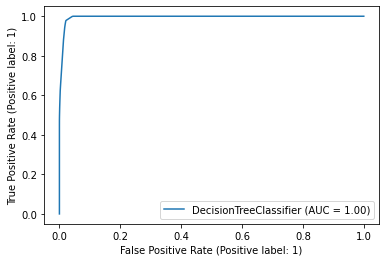

In [179]:
# ROC curve on best estimator
plot_roc_curve(dt_best, x_train_pca, y_train_sm)
plt.show()

In [180]:
# model with optimal hyperparameters
dtoptimized = DecisionTreeClassifier( 
                                  random_state = 42,
                                  max_depth=25, 
                                  min_samples_leaf=2)
dtoptimized.fit(x_train_pca, y_train_sm)

DecisionTreeClassifier(max_depth=25, min_samples_leaf=2, random_state=42)

In [181]:
# Predicting churn on the basis of best model(optimised)
y_train_pred = dtoptimized.predict(x_train_pca)
y_test_pred = dtoptimized.predict(x_test_pca)

In [182]:
# looking at classification report on test data
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      8272
           1       0.24      0.49      0.32       729

    accuracy                           0.83      9001
   macro avg       0.59      0.67      0.61      9001
weighted avg       0.89      0.83      0.86      9001



In [183]:
# looking at classification report on train data
print(classification_report(y_train_sm, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     19288
           1       0.98      0.98      0.98     19288

    accuracy                           0.98     38576
   macro avg       0.98      0.98      0.98     38576
weighted avg       0.98      0.98      0.98     38576



#### Evaluating  train data

In [184]:
y_train_pred_final_dt = pd.DataFrame({'Churn':y_train_sm, 'Churn_predicted':y_train_pred})
y_train_pred_final_dt.head()

,Churn,Churn_predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [185]:
print("Accuracy Score is:", metrics.accuracy_score(y_train_pred_final_dt.Churn, y_train_pred_final_dt.Churn_predicted))

Accuracy Score is: 0.97848403152219


In [186]:
confusionTrainFinal = metrics.confusion_matrix(y_train_pred_final_dt.Churn, y_train_pred_final_dt.Churn_predicted)
print(confusionTrainFinal)

[[18848   440]
 [  390 18898]]


In [187]:
TP = confusionTestFinal[1,1] # true positive 
TN = confusionTestFinal[0,0] # true negatives
FP = confusionTestFinal[0,1] # false positives
FN = confusionTestFinal[1,0] # false negatives

In [188]:
print("Sensitivity Score is:", round(TP / float(TP+FN), 2))
print("Specificity Score is:", round(TN / float(TN+FP), 2))
print ("Positive predictive value is:", round(TP / float(TP+FP), 2))
print ("Negative predictive value is:", round(TN / float(TN+ FN), 2))
print("False postive rate is:", round(FP/ float(TN+FP), 2))

Sensitivity Score is: 0.79
Specificity Score is: 0.84
Positive predictive value is: 0.31
Negative predictive value is: 0.98
False postive rate is: 0.16


#### Evaluating test data

In [189]:
y_test_pred_final_dt = pd.DataFrame({'Churn':y_test, 'Chur_predicted':y_test_pred})
y_test_pred_final_dt.head()

,Churn,Chur_predicted
10747,0,1
12573,0,0
29677,0,0
8856,0,0
21098,0,0


- Moving on to building the confusion matrix for model evaluation metrics calculation :

In [190]:
print("Accuracy Score is:", metrics.accuracy_score(y_test_pred_final_dt.Churn, y_test_pred_final_dt.Chur_predicted))

Accuracy Score is: 0.8299077880235529


In [191]:
confusionTestFinal = metrics.confusion_matrix(y_test_pred_final_dt.Churn, y_test_pred_final_dt.Chur_predicted)
print(confusionTestFinal)

[[7113 1159]
 [ 372  357]]


- We will now obtain the true positives/negatives and false positives/negatives into variables to calculate Accuracy, Sensitivity and other metrics :

In [192]:
TP = confusionTestFinal[1,1] # true positive 
TN = confusionTestFinal[0,0] # true negatives
FP = confusionTestFinal[0,1] # false positives
FN = confusionTestFinal[1,0] # false negatives

In [193]:
print("Sensitivity Score is:", round(TP / float(TP+FN), 2))
print("Specificity Score is:", round(TN / float(TN+FP), 2))
print ("Positive predictive value is:", round(TP / float(TP+FP), 2))
print ("Negative predictive value is:", round(TN / float(TN+ FN), 2))
print("False postive rate is:", round(FP/ float(TN+FP), 2))

Sensitivity Score is: 0.49
Specificity Score is: 0.86
Positive predictive value is: 0.24
Negative predictive value is: 0.95
False postive rate is: 0.14


### Random Forest

In [194]:
from sklearn.ensemble import RandomForestClassifier

In [195]:
# building default tree 
rf = RandomForestClassifier(n_estimators=10, max_depth=25, max_features=5, random_state=42, oob_score=True)

In [196]:
# fitting on train data
rf.fit(x_train_pca, y_train_sm)

RandomForestClassifier(max_depth=25, max_features=5, n_estimators=10,
                       oob_score=True, random_state=42)

In [197]:
rf.oob_score_

0.8984342596433015

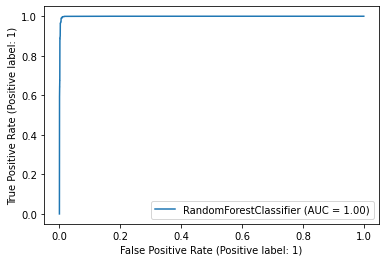

In [198]:
# ROC Curve on train data
plot_roc_curve(rf, x_train_pca, y_train_sm)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [199]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [200]:
params = {
    'max_depth': [5,10,20,50,100],
    'min_samples_leaf': [2,3,5,10],
    'n_estimators': [10,20,50],
    'max_features': [5, 10, 15]
}


In [201]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [202]:
# finding out best hyper parameters
grid_search.fit(x_train_pca, y_train_sm)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 50, 100],
                         'max_features': [5, 10, 15],
                         'min_samples_leaf': [2, 3, 5, 10],
                         'n_estimators': [10, 20, 50]},
             scoring='accuracy', verbose=1)

In [203]:
grid_search.best_score_

0.9457694735510547

In [204]:
# best estimators
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=50, max_features=5, min_samples_leaf=2,
                       n_estimators=50, n_jobs=-1, random_state=42)

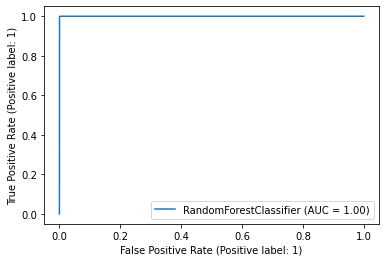

In [205]:
# ROC curve of best model
plot_roc_curve(rf_best, x_train_pca, y_train_sm)
plt.show()

In [206]:

# model with optimal hyperparameters(best)
rfoptimized = RandomForestClassifier( 
                                  max_depth=50,
                                  min_samples_leaf= 2,
                                  n_estimators=50,
                                  max_features= 5
                                 ,random_state=42, n_jobs=-1,oob_score=True)
rfoptimized.fit(x_train_pca, y_train_sm)

RandomForestClassifier(max_depth=50, max_features=5, min_samples_leaf=2,
                       n_estimators=50, n_jobs=-1, oob_score=True,
                       random_state=42)

In [207]:
# Predicting on train anmd test data with best model
y_train_pred = rfoptimized.predict(x_train_pca)
y_test_pred = rfoptimized.predict(x_test_pca)

In [208]:
# looking at classification report on test data
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      8272
           1       0.40      0.44      0.42       729

    accuracy                           0.90      9001
   macro avg       0.68      0.69      0.68      9001
weighted avg       0.91      0.90      0.90      9001



In [209]:
# looking at classification report on train data
print(classification_report(y_train_sm, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19288
           1       1.00      1.00      1.00     19288

    accuracy                           1.00     38576
   macro avg       1.00      1.00      1.00     38576
weighted avg       1.00      1.00      1.00     38576



Evaluating Train data set using best model

In [210]:
y_train_pred_final_rf = pd.DataFrame({'Churn':y_train_sm, 'Churn_predicted':y_train_pred})
y_train_pred_final_rf.head()

,Churn,Churn_predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [211]:
print("Accuracy Score is:", metrics.accuracy_score(y_train_pred_final_rf.Churn, y_train_pred_final_rf.Churn_predicted))

Accuracy Score is: 0.9985483201990876


In [212]:
confusionTrainFinal = metrics.confusion_matrix(y_train_pred_final_rf.Churn, y_train_pred_final_rf.Churn_predicted)
print(confusionTrainFinal)

[[19234    54]
 [    2 19286]]


In [213]:
TP = confusionTestFinal[1,1] # true positive 
TN = confusionTestFinal[0,0] # true negatives
FP = confusionTestFinal[0,1] # false positives
FN = confusionTestFinal[1,0] # false negatives

In [214]:
print("Sensitivity Score is:", round(TP / float(TP+FN), 2))
print("Specificity Score is:", round(TN / float(TN+FP), 2))
print ("Positive predictive value is:", round(TP / float(TP+FP), 2))
print ("Negative predictive value is:", round(TN / float(TN+ FN), 2))
print("False postive rate is:", round(FP/ float(TN+FP), 2))

Sensitivity Score is: 0.49
Specificity Score is: 0.86
Positive predictive value is: 0.24
Negative predictive value is: 0.95
False postive rate is: 0.14


Evaluating Test data set using best model

In [215]:
y_test_pred_final_rf = pd.DataFrame({'Churn':y_test, 'Chur_predicted':y_test_pred})
y_test_pred_final_rf.head()

,Churn,Chur_predicted
10747,0,1
12573,0,0
29677,0,0
8856,0,0
21098,0,0


- Moving on to building the confusion matrix for model evaluation metrics calculation :

In [216]:
print("Accuracy Score is:", metrics.accuracy_score(y_test_pred_final_rf.Churn, y_test_pred_final_rf.Chur_predicted))

Accuracy Score is: 0.9016775913787357


In [217]:
confusionTestFinal = metrics.confusion_matrix(y_test_pred_final_rf.Churn, y_test_pred_final_rf.Chur_predicted)
print(confusionTestFinal)

[[7792  480]
 [ 405  324]]


- We will now obtain the true positives/negatives and false positives/negatives into variables to calculate Accuracy, Sensitivity and other metrics :

In [218]:
TP = confusionTestFinal[1,1] # true positive 
TN = confusionTestFinal[0,0] # true negatives
FP = confusionTestFinal[0,1] # false positives
FN = confusionTestFinal[1,0] # false negatives

In [219]:
print("Sensitivity Score is:", round(TP / float(TP+FN), 2))
print("Specificity Score is:", round(TN / float(TN+FP), 2))
print ("Positive predictive value is:", round(TP / float(TP+FP), 2))
print ("Negative predictive value is:", round(TN / float(TN+ FN), 2))
print("False postive rate is:", round(FP/ float(TN+FP), 2))

Sensitivity Score is: 0.44
Specificity Score is: 0.94
Positive predictive value is: 0.4
Negative predictive value is: 0.95
False postive rate is: 0.06


### XGBoost

In [220]:
# Importing liberaries
import xgboost as xgb
from sklearn import metrics



In [221]:
# Building base model with XGBoost
xgb_model = xgb.XGBClassifier()
from sklearn import model_selection

# Default-Run of default-hyperparameters
parameters = {'learning_rate': [0.3],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [100]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(x_train_pca, y_train_sm)

[23:05:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [222]:
# AUC of test and train data set
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train_sm,
                                                              y_score=clf_xgb.predict_proba(x_train_pca)[:, 1]))
print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=clf_xgb.predict_proba(x_test_pca)[:, 1]))

AUC on train data by XGBoost = 0.9993705724712241
AUC on test data by XGBoost = 0.8523801848269933


#### XGBoost - Hyperparameter Tuning

In [223]:
# 1st-Run for best hyperparameters
# hyperparameter tuning with XGBoost

from xgboost import XGBClassifier

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2,0.3,0.5],           
              'max_depth': [5,10,50],
              'n_estimators': [50, 100, 150]
             }          


# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_sm, y_train_sm)       

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[23:05:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:06:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:06:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. E

[23:11:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:11:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:12:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:12:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[23:17:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:17:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:18:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:18:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [224]:
print(model_cv.best_params_)
print(model_cv.best_score_)
print(model_cv.best_estimator_)

{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100}
0.995225569578963
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [226]:
final_model = xgb.XGBClassifier(learning_rate=0.2,
                                max_depth=10,
                                n_estimators=100)

final_model.fit(X_train_sm, y_train_sm)
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train_sm,
                                                              y_score=clf_xgb.predict_proba(x_train_pca)[:, 1]))
print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=clf_xgb.predict_proba(x_test_pca)[:, 1]))

[23:22:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC on train data by XGBoost = 0.9993705724712241
AUC on test data by XGBoost = 0.8523801848269933


In [227]:
# Predicting on train anmd test data with best model
y_train_pred = rfoptimized.predict(x_train_pca)
y_test_pred = rfoptimized.predict(x_test_pca)

In [228]:
# looking at classification report on test data
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      8272
           1       0.40      0.44      0.42       729

    accuracy                           0.90      9001
   macro avg       0.68      0.69      0.68      9001
weighted avg       0.91      0.90      0.90      9001



In [229]:
# looking at classification report on train data
print(classification_report(y_train_sm, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19288
           1       1.00      1.00      1.00     19288

    accuracy                           1.00     38576
   macro avg       1.00      1.00      1.00     38576
weighted avg       1.00      1.00      1.00     38576



Evaluating Train data set using best model

In [230]:
y_train_pred_final_xg = pd.DataFrame({'Churn':y_train_sm, 'Churn_predicted':y_train_pred})
y_train_pred_final_xg.head()

,Churn,Churn_predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [231]:
print("Accuracy Score is:", metrics.accuracy_score(y_train_pred_final_xg.Churn, y_train_pred_final_xg.Churn_predicted))

Accuracy Score is: 0.9985483201990876


In [232]:
confusionTrainFinal = metrics.confusion_matrix(y_train_pred_final_xg.Churn, y_train_pred_final_xg.Churn_predicted)
print(confusionTrainFinal)

[[19234    54]
 [    2 19286]]


In [233]:
TP = confusionTestFinal[1,1] # true positive 
TN = confusionTestFinal[0,0] # true negatives
FP = confusionTestFinal[0,1] # false positives
FN = confusionTestFinal[1,0] # false negatives

In [234]:
print("Sensitivity Score is:", round(TP / float(TP+FN), 2))
print("Specificity Score is:", round(TN / float(TN+FP), 2))
print ("Positive predictive value is:", round(TP / float(TP+FP), 2))
print ("Negative predictive value is:", round(TN / float(TN+ FN), 2))
print("False postive rate is:", round(FP/ float(TN+FP), 2))

Sensitivity Score is: 0.44
Specificity Score is: 0.94
Positive predictive value is: 0.4
Negative predictive value is: 0.95
False postive rate is: 0.06


Evaluating Test data set using best model

In [235]:
y_test_pred_final_xg = pd.DataFrame({'Churn':y_test, 'Chur_predicted':y_test_pred})
y_test_pred_final_xg.head()

,Churn,Chur_predicted
10747,0,1
12573,0,0
29677,0,0
8856,0,0
21098,0,0


- Moving on to building the confusion matrix for model evaluation metrics calculation :

In [236]:
print("Accuracy Score is:", metrics.accuracy_score(y_test_pred_final_xg.Churn, y_test_pred_final_xg.Chur_predicted))

Accuracy Score is: 0.9016775913787357


In [237]:
confusionTestFinal = metrics.confusion_matrix(y_test_pred_final_xg.Churn, y_test_pred_final_xg.Chur_predicted)
print(confusionTestFinal)

[[7792  480]
 [ 405  324]]


- We will now obtain the true positives/negatives and false positives/negatives into variables to calculate Accuracy, Sensitivity and other metrics :

In [238]:
TP = confusionTestFinal[1,1] # true positive 
TN = confusionTestFinal[0,0] # true negatives
FP = confusionTestFinal[0,1] # false positives
FN = confusionTestFinal[1,0] # false negatives

In [239]:
print("Sensitivity Score is:", round(TP / float(TP+FN), 2))
print("Specificity Score is:", round(TN / float(TN+FP), 2))
print ("Positive predictive value is:", round(TP / float(TP+FP), 2))
print ("Negative predictive value is:", round(TN / float(TN+ FN), 2))
print("False postive rate is:", round(FP/ float(TN+FP), 2))

Sensitivity Score is: 0.44
Specificity Score is: 0.94
Positive predictive value is: 0.4
Negative predictive value is: 0.95
False postive rate is: 0.06


> ### Model Insights 

**Random forest** with tuned hyperparameters produce best result on this dataset with 0.901 accuracy.

**Decision tree** with acuracy 0.83 was also good.

**Logistic Regression without PCA** also produce good accuracy with 0.836.

 **XGBoost** also produce apt accuracy of 0.9016 with tuned hyperparameters.

 **As per our analysis Random forest and Logistic Regression without PCA produce best accuracy and models can be selected to predict churn data for future dataset or production.**

**But as per requirement we have to get best sensitivity model which was decision tree model.**

> ### Business Insights 

Less number of **high value customer** are churing but for last **6 month** no new high valued cusotmer is onboarded which is concerning and company should concentrate on that aspect. </span>

Customers with less than **4 years** of tenure are more likely to churn and company should concentrate more on that segment by rolling out new schems to that group. 

3g data volume usage keep on decreasing for churn customer while it will remain same for non churn people over time

2G and 3G data usage keep on decreasing for churning people while for non churners it will remain constant

**Average revenue per user** seems to be most important feature in determining churn prediction. 

**Incoming** and **Outgoing Calls** on **romaing** for 8th month are strong indicators of churn behaviour

**Local Outgoing calls** made to landline , fixedline , mobile and call center provides a strong indicator of churn behaviour. 

Better 2G/3G area coverage where 2G/3G services are not good, it's strong indicator of churn behaviour.